# Decision Trees and Random Forests - Machine Learning with Python

This tutorial is a part of [Zero to Data Science Bootcamp by Jovian](https://zerotodatascience.com) and [Machine Learning with Python: Zero to GBMs](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms)

![](https://i.imgur.com/N8aIuRK.jpg)

The following topics are covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting, hyperparameter tuning & regularization
- Making predictions on single inputs



### How to run the code

This tutorial is an executable [Jupyter notebook](https://jupyter.org) hosted on [Jovian](https://www.jovian.ai). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Colab**. You will be prompted to connect your Google Drive account so that this notebook can be placed into your drive for execution.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.



## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to use _decision trees_ and _random forests_ to solve a real-world problem from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


Let's install and import some required libraries before we begin.

In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

In [2]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [3]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [4]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


The dataset is downloaded and extracted to the folder `weather-dataset-rattle-package`.

In [5]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

The file `weatherAUS.csv` contains the data. Let's load it into a Pandas dataframe.

In [6]:
# loading the dataset using pandas
raw_df = pd.read_csv("weather-dataset-rattle-package/weatherAUS.csv")

In [7]:
# Looking at the dataset
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [8]:
# let's check the column types of the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null



Let's drop any rows where the value of the target column `RainTomorrow` in empty.

In [9]:
raw_df.dropna(subset =['RainTomorrow'], inplace=True)

Let's save our work before continuing.

> **EXERCISE**: Perform exploratory data analysis on the dataset and study the relationship of other columns with the `RainTomorrow` column.

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Training, Validation and Test Sets

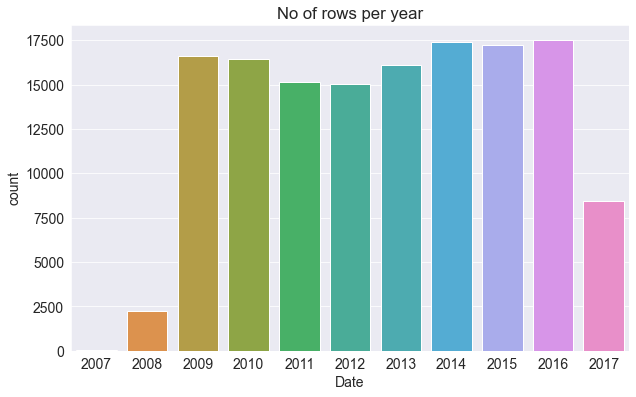

In [10]:
plt.title('No of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

While working with chronological data, it's often a good idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

We'll use the data till 2014 for the training set, data from 2015 for the validation set, and the data from 2016 & 2017 for the test set.  

In [11]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [12]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


> **EXERCISE**: Scrape climate data for recent years (2017 to 2021) from http://www.bom.gov.au/climate/data and try training a model with the enlarged dataset. 

### Input and Target Columns

Let's identify the input and target columns.

In [13]:
input_cols = list(train_df.columns)[1:-1]
# as the date column is on index 0 and the target column RainTomorrow is on index -1 we used [1:-1]
target_col = 'RainTomorrow'

In [14]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [15]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [16]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Let's now identify the numerical and categorical columns 

In [17]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes('object').columns.tolist()

In [18]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [19]:
print(categorical_cols)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


> **EXERCISE**: Study how various columns are correlated with the target and select just a subset of the columns, instead of all of the. Observe how it affects the results.

### Imputing missing numeric values

## Univariate Imputation
This type of imputation imputes the missing values of a feature(column) using the non-missing values of that feature(column)

`SimpleImputer` from `sklearn.impute` is used for univariate imputation of numeric values

Before beginning with the imputation process let's first look at the number of missing values in the numeric columns of the train_input and have a look at some basis statistics for the numeric columns this will include the mean, median(50% value) 

In [20]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [21]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98554.000000,98790.00000,97988.000000,61878.00000,58292.000000,92086.000000,97855.000000,97848.000000,97723.000000,97802.000000,89643.000000,89679.000000,63224.000000,62222.000000,98205.000000,98325.000000
mean,12.002014,23.00288,2.372935,5.28686,7.602136,40.230969,14.102192,18.770430,68.651822,51.501728,1017.518046,1015.138523,4.308048,4.414451,16.827340,21.525622
std,6.345487,6.99008,8.518819,3.95104,3.788266,13.713042,8.994121,8.877497,18.995535,20.742760,7.073083,6.997504,2.867317,2.694295,6.399855,6.832509
min,-8.500000,-4.10000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.80000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.40000,0.000000,4.60000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.500000,20.900000
75%,16.600000,27.90000,0.800000,7.20000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.300000,26.100000
max,33.900000,48.10000,371.000000,82.40000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


There is a Parameter `strategy` in the Simple Imputer function which can have the following values
* "mean"- Fills the missing values with the mean of non missing values
* "median" - Fills the missing values with the median of non missing values
* "most_frequent" - Fills the missing values with the value that occurs most frequently or we can say the mode of the numeric data
* "constant" - Fills the missing with the value provided in `fill_value` parameter of SimpleImputer.

By default the strategy is set to mean.

### SimpleImputer (strategy ='mean')

Lets import `SimpleImputer` from `sklearn.impute`

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
# Model Creation
imputer = SimpleImputer(strategy ='mean')
# fitting the imputer on the original dataset
imputer.fit(raw_df[numeric_cols])
# Imputing the missing values in train, validation and test inputs
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

Now let's see the number of missing values in the train_inputs after imputation

In [24]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

> **EXERCISE**: Try a different [imputation strategy](https://scikit-learn.org/stable/modules/impute.html#impute) and observe how it affects the results.

### Scaling Numeric Features

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [27]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [28]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


> **EXERCISE**: Try a different [scaling strategy](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) and observe how it affects the results.

### Encoding Categorical Data

In [29]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,24.0,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,19.0,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,26.0,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,28.0,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [30]:
categorical_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
train_df[categorical_cols].isna().sum()

Date               0
Location           0
WindGustDir     6943
WindDir9am      7323
WindDir3pm      2030
RainToday       1000
RainTomorrow       0
dtype: int64

In [33]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [34]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [35]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

KeyError: "['Date', 'RainTomorrow'] not in index"

In [36]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,No
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,No
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,Yes
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,Yes
2502,Albury,0.566038,0.523629,0.018329,0.037723,0.525852,ENE,0.193798,SE,SSE,0.046154,0.103448,0.92,0.63,0.591736,0.5888,0.888889,0.888889,0.514768,0.529750,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037723,0.525852,E,0.193798,ESE,E,0.115385,0.149425,0.59,0.27,0.730579,0.7056,0.493021,0.500352,0.350211,0.504798,No
145455,Uluru,0.266509,0.533081,0.000000,0.037723,0.525852,E,0.193798,SE,ENE,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.493021,0.500352,0.364979,0.533589,No
145456,Uluru,0.285377,0.568998,0.000000,0.037723,0.525852,NNW,0.124031,SE,N,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.493021,0.500352,0.381857,0.573896,No
145457,Uluru,0.327830,0.599244,0.000000,0.037723,0.525852,N,0.240310,SE,WNW,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.493021,0.500352,0.415612,0.604607,No


> **EXERCISE**: Try a different [encoding strategy](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) and observe how it affects the results.

As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [37]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

KeyError: "['Date_2007-11-01', 'Date_2007-11-02', 'Date_2007-11-03', 'Date_2007-11-04', 'Date_2007-11-05', 'Date_2007-11-06', 'Date_2007-11-07', 'Date_2007-11-08', 'Date_2007-11-09', 'Date_2007-11-10', 'Date_2007-11-11', 'Date_2007-11-12', 'Date_2007-11-13', 'Date_2007-11-14', 'Date_2007-11-15', 'Date_2007-11-16', 'Date_2007-11-17', 'Date_2007-11-18', 'Date_2007-11-19', 'Date_2007-11-20', 'Date_2007-11-21', 'Date_2007-11-22', 'Date_2007-11-23', 'Date_2007-11-24', 'Date_2007-11-25', 'Date_2007-11-26', 'Date_2007-11-27', 'Date_2007-11-28', 'Date_2007-11-29', 'Date_2007-11-30', 'Date_2007-12-01', 'Date_2007-12-02', 'Date_2007-12-03', 'Date_2007-12-04', 'Date_2007-12-05', 'Date_2007-12-06', 'Date_2007-12-07', 'Date_2007-12-08', 'Date_2007-12-09', 'Date_2007-12-10', 'Date_2007-12-11', 'Date_2007-12-12', 'Date_2007-12-13', 'Date_2007-12-14', 'Date_2007-12-15', 'Date_2007-12-16', 'Date_2007-12-17', 'Date_2007-12-18', 'Date_2007-12-19', 'Date_2007-12-20', 'Date_2007-12-21', 'Date_2007-12-22', 'Date_2007-12-23', 'Date_2007-12-24', 'Date_2007-12-25', 'Date_2007-12-26', 'Date_2007-12-27', 'Date_2007-12-28', 'Date_2007-12-29', 'Date_2007-12-30', 'Date_2007-12-31', 'Date_2008-01-01', 'Date_2008-01-02', 'Date_2008-01-03', 'Date_2008-01-04', 'Date_2008-01-05', 'Date_2008-01-06', 'Date_2008-01-07', 'Date_2008-01-08', 'Date_2008-01-09', 'Date_2008-01-10', 'Date_2008-01-11', 'Date_2008-01-12', 'Date_2008-01-13', 'Date_2008-01-14', 'Date_2008-01-15', 'Date_2008-01-16', 'Date_2008-01-17', 'Date_2008-01-18', 'Date_2008-01-19', 'Date_2008-01-20', 'Date_2008-01-21', 'Date_2008-01-22', 'Date_2008-01-23', 'Date_2008-01-24', 'Date_2008-01-25', 'Date_2008-01-26', 'Date_2008-01-27', 'Date_2008-01-28', 'Date_2008-01-29', 'Date_2008-01-30', 'Date_2008-01-31', 'Date_2008-02-01', 'Date_2008-02-02', 'Date_2008-02-03', 'Date_2008-02-04', 'Date_2008-02-05', 'Date_2008-02-06', 'Date_2008-02-07', 'Date_2008-02-08', 'Date_2008-02-09', 'Date_2008-02-10', 'Date_2008-02-11', 'Date_2008-02-12', 'Date_2008-02-13', 'Date_2008-02-14', 'Date_2008-02-15', 'Date_2008-02-16', 'Date_2008-02-17', 'Date_2008-02-18', 'Date_2008-02-19', 'Date_2008-02-20', 'Date_2008-02-21', 'Date_2008-02-22', 'Date_2008-02-23', 'Date_2008-02-24', 'Date_2008-02-25', 'Date_2008-02-26', 'Date_2008-02-27', 'Date_2008-02-28', 'Date_2008-02-29', 'Date_2008-03-01', 'Date_2008-03-02', 'Date_2008-03-03', 'Date_2008-03-04', 'Date_2008-03-05', 'Date_2008-03-06', 'Date_2008-03-07', 'Date_2008-03-08', 'Date_2008-03-09', 'Date_2008-03-10', 'Date_2008-03-11', 'Date_2008-03-12', 'Date_2008-03-13', 'Date_2008-03-14', 'Date_2008-03-15', 'Date_2008-03-16', 'Date_2008-03-17', 'Date_2008-03-18', 'Date_2008-03-19', 'Date_2008-03-20', 'Date_2008-03-21', 'Date_2008-03-22', 'Date_2008-03-23', 'Date_2008-03-24', 'Date_2008-03-25', 'Date_2008-03-26', 'Date_2008-03-27', 'Date_2008-03-28', 'Date_2008-03-29', 'Date_2008-03-30', 'Date_2008-03-31', 'Date_2008-04-01', 'Date_2008-04-02', 'Date_2008-04-03', 'Date_2008-04-04', 'Date_2008-04-05', 'Date_2008-04-06', 'Date_2008-04-07', 'Date_2008-04-08', 'Date_2008-04-09', 'Date_2008-04-10', 'Date_2008-04-11', 'Date_2008-04-12', 'Date_2008-04-13', 'Date_2008-04-14', 'Date_2008-04-15', 'Date_2008-04-16', 'Date_2008-04-17', 'Date_2008-04-18', 'Date_2008-04-19', 'Date_2008-04-20', 'Date_2008-04-21', 'Date_2008-04-22', 'Date_2008-04-23', 'Date_2008-04-24', 'Date_2008-04-25', 'Date_2008-04-26', 'Date_2008-04-27', 'Date_2008-04-28', 'Date_2008-04-29', 'Date_2008-04-30', 'Date_2008-05-01', 'Date_2008-05-02', 'Date_2008-05-03', 'Date_2008-05-04', 'Date_2008-05-05', 'Date_2008-05-06', 'Date_2008-05-07', 'Date_2008-05-08', 'Date_2008-05-09', 'Date_2008-05-10', 'Date_2008-05-11', 'Date_2008-05-12', 'Date_2008-05-13', 'Date_2008-05-14', 'Date_2008-05-15', 'Date_2008-05-16', 'Date_2008-05-17', 'Date_2008-05-18', 'Date_2008-05-19', 'Date_2008-05-20', 'Date_2008-05-21', 'Date_2008-05-22', 'Date_2008-05-23', 'Date_2008-05-24', 'Date_2008-05-25', 'Date_2008-05-26', 'Date_2008-05-27', 'Date_2008-05-28', 'Date_2008-05-29', 'Date_2008-05-30', 'Date_2008-05-31', 'Date_2008-06-01', 'Date_2008-06-02', 'Date_2008-06-03', 'Date_2008-06-04', 'Date_2008-06-05', 'Date_2008-06-06', 'Date_2008-06-07', 'Date_2008-06-08', 'Date_2008-06-09', 'Date_2008-06-10', 'Date_2008-06-11', 'Date_2008-06-12', 'Date_2008-06-13', 'Date_2008-06-14', 'Date_2008-06-15', 'Date_2008-06-16', 'Date_2008-06-17', 'Date_2008-06-18', 'Date_2008-06-19', 'Date_2008-06-20', 'Date_2008-06-21', 'Date_2008-06-22', 'Date_2008-06-23', 'Date_2008-06-24', 'Date_2008-06-25', 'Date_2008-06-26', 'Date_2008-06-27', 'Date_2008-06-28', 'Date_2008-06-29', 'Date_2008-06-30', 'Date_2008-07-01', 'Date_2008-07-02', 'Date_2008-07-03', 'Date_2008-07-04', 'Date_2008-07-05', 'Date_2008-07-06', 'Date_2008-07-07', 'Date_2008-07-08', 'Date_2008-07-09', 'Date_2008-07-10', 'Date_2008-07-11', 'Date_2008-07-12', 'Date_2008-07-13', 'Date_2008-07-14', 'Date_2008-07-15', 'Date_2008-07-16', 'Date_2008-07-17', 'Date_2008-07-18', 'Date_2008-07-19', 'Date_2008-07-20', 'Date_2008-07-21', 'Date_2008-07-22', 'Date_2008-07-23', 'Date_2008-07-24', 'Date_2008-07-25', 'Date_2008-07-26', 'Date_2008-07-27', 'Date_2008-07-28', 'Date_2008-07-29', 'Date_2008-07-30', 'Date_2008-07-31', 'Date_2008-08-01', 'Date_2008-08-02', 'Date_2008-08-03', 'Date_2008-08-04', 'Date_2008-08-05', 'Date_2008-08-06', 'Date_2008-08-07', 'Date_2008-08-08', 'Date_2008-08-09', 'Date_2008-08-10', 'Date_2008-08-11', 'Date_2008-08-12', 'Date_2008-08-13', 'Date_2008-08-14', 'Date_2008-08-15', 'Date_2008-08-16', 'Date_2008-08-17', 'Date_2008-08-18', 'Date_2008-08-19', 'Date_2008-08-20', 'Date_2008-08-21', 'Date_2008-08-22', 'Date_2008-08-23', 'Date_2008-08-24', 'Date_2008-08-25', 'Date_2008-08-26', 'Date_2008-08-27', 'Date_2008-08-28', 'Date_2008-08-29', 'Date_2008-08-30', 'Date_2008-08-31', 'Date_2008-09-01', 'Date_2008-09-02', 'Date_2008-09-03', 'Date_2008-09-04', 'Date_2008-09-05', 'Date_2008-09-06', 'Date_2008-09-07', 'Date_2008-09-08', 'Date_2008-09-09', 'Date_2008-09-10', 'Date_2008-09-11', 'Date_2008-09-12', 'Date_2008-09-13', 'Date_2008-09-14', 'Date_2008-09-15', 'Date_2008-09-16', 'Date_2008-09-17', 'Date_2008-09-18', 'Date_2008-09-19', 'Date_2008-09-20', 'Date_2008-09-21', 'Date_2008-09-22', 'Date_2008-09-23', 'Date_2008-09-24', 'Date_2008-09-25', 'Date_2008-09-26', 'Date_2008-09-27', 'Date_2008-09-28', 'Date_2008-09-29', 'Date_2008-09-30', 'Date_2008-10-01', 'Date_2008-10-02', 'Date_2008-10-03', 'Date_2008-10-04', 'Date_2008-10-05', 'Date_2008-10-06', 'Date_2008-10-07', 'Date_2008-10-08', 'Date_2008-10-09', 'Date_2008-10-10', 'Date_2008-10-11', 'Date_2008-10-12', 'Date_2008-10-13', 'Date_2008-10-14', 'Date_2008-10-15', 'Date_2008-10-16', 'Date_2008-10-17', 'Date_2008-10-18', 'Date_2008-10-19', 'Date_2008-10-20', 'Date_2008-10-21', 'Date_2008-10-22', 'Date_2008-10-23', 'Date_2008-10-24', 'Date_2008-10-25', 'Date_2008-10-26', 'Date_2008-10-27', 'Date_2008-10-28', 'Date_2008-10-29', 'Date_2008-10-30', 'Date_2008-10-31', 'Date_2008-11-01', 'Date_2008-11-02', 'Date_2008-11-03', 'Date_2008-11-04', 'Date_2008-11-05', 'Date_2008-11-06', 'Date_2008-11-07', 'Date_2008-11-08', 'Date_2008-11-09', 'Date_2008-11-10', 'Date_2008-11-11', 'Date_2008-11-12', 'Date_2008-11-13', 'Date_2008-11-14', 'Date_2008-11-15', 'Date_2008-11-16', 'Date_2008-11-17', 'Date_2008-11-18', 'Date_2008-11-19', 'Date_2008-11-20', 'Date_2008-11-21', 'Date_2008-11-22', 'Date_2008-11-23', 'Date_2008-11-24', 'Date_2008-11-25', 'Date_2008-11-26', 'Date_2008-11-27', 'Date_2008-11-28', 'Date_2008-11-29', 'Date_2008-11-30', 'Date_2008-12-01', 'Date_2008-12-02', 'Date_2008-12-03', 'Date_2008-12-04', 'Date_2008-12-05', 'Date_2008-12-06', 'Date_2008-12-07', 'Date_2008-12-08', 'Date_2008-12-09', 'Date_2008-12-10', 'Date_2008-12-11', 'Date_2008-12-12', 'Date_2008-12-13', 'Date_2008-12-14', 'Date_2008-12-15', 'Date_2008-12-16', 'Date_2008-12-17', 'Date_2008-12-18', 'Date_2008-12-19', 'Date_2008-12-20', 'Date_2008-12-21', 'Date_2008-12-22', 'Date_2008-12-23', 'Date_2008-12-24', 'Date_2008-12-25', 'Date_2008-12-26', 'Date_2008-12-27', 'Date_2008-12-28', 'Date_2008-12-29', 'Date_2008-12-30', 'Date_2008-12-31', 'Date_2009-01-01', 'Date_2009-01-02', 'Date_2009-01-03', 'Date_2009-01-04', 'Date_2009-01-05', 'Date_2009-01-06', 'Date_2009-01-07', 'Date_2009-01-08', 'Date_2009-01-09', 'Date_2009-01-10', 'Date_2009-01-11', 'Date_2009-01-12', 'Date_2009-01-13', 'Date_2009-01-14', 'Date_2009-01-15', 'Date_2009-01-16', 'Date_2009-01-17', 'Date_2009-01-18', 'Date_2009-01-19', 'Date_2009-01-20', 'Date_2009-01-21', 'Date_2009-01-22', 'Date_2009-01-23', 'Date_2009-01-24', 'Date_2009-01-25', 'Date_2009-01-26', 'Date_2009-01-27', 'Date_2009-01-28', 'Date_2009-01-29', 'Date_2009-01-30', 'Date_2009-01-31', 'Date_2009-02-01', 'Date_2009-02-02', 'Date_2009-02-03', 'Date_2009-02-04', 'Date_2009-02-05', 'Date_2009-02-06', 'Date_2009-02-07', 'Date_2009-02-08', 'Date_2009-02-09', 'Date_2009-02-10', 'Date_2009-02-11', 'Date_2009-02-12', 'Date_2009-02-13', 'Date_2009-02-14', 'Date_2009-02-15', 'Date_2009-02-16', 'Date_2009-02-17', 'Date_2009-02-18', 'Date_2009-02-19', 'Date_2009-02-20', 'Date_2009-02-21', 'Date_2009-02-22', 'Date_2009-02-23', 'Date_2009-02-24', 'Date_2009-02-25', 'Date_2009-02-26', 'Date_2009-02-27', 'Date_2009-02-28', 'Date_2009-03-01', 'Date_2009-03-02', 'Date_2009-03-03', 'Date_2009-03-04', 'Date_2009-03-05', 'Date_2009-03-06', 'Date_2009-03-07', 'Date_2009-03-08', 'Date_2009-03-09', 'Date_2009-03-10', 'Date_2009-03-11', 'Date_2009-03-12', 'Date_2009-03-13', 'Date_2009-03-14', 'Date_2009-03-15', 'Date_2009-03-16', 'Date_2009-03-17', 'Date_2009-03-18', 'Date_2009-03-19', 'Date_2009-03-20', 'Date_2009-03-21', 'Date_2009-03-22', 'Date_2009-03-23', 'Date_2009-03-24', 'Date_2009-03-25', 'Date_2009-03-26', 'Date_2009-03-27', 'Date_2009-03-28', 'Date_2009-03-29', 'Date_2009-03-30', 'Date_2009-03-31', 'Date_2009-04-01', 'Date_2009-04-02', 'Date_2009-04-03', 'Date_2009-04-04', 'Date_2009-04-05', 'Date_2009-04-06', 'Date_2009-04-07', 'Date_2009-04-08', 'Date_2009-04-09', 'Date_2009-04-10', 'Date_2009-04-11', 'Date_2009-04-12', 'Date_2009-04-13', 'Date_2009-04-14', 'Date_2009-04-15', 'Date_2009-04-16', 'Date_2009-04-17', 'Date_2009-04-18', 'Date_2009-04-19', 'Date_2009-04-20', 'Date_2009-04-21', 'Date_2009-04-22', 'Date_2009-04-23', 'Date_2009-04-24', 'Date_2009-04-25', 'Date_2009-04-26', 'Date_2009-04-27', 'Date_2009-04-28', 'Date_2009-04-29', 'Date_2009-04-30', 'Date_2009-05-01', 'Date_2009-05-02', 'Date_2009-05-03', 'Date_2009-05-04', 'Date_2009-05-05', 'Date_2009-05-06', 'Date_2009-05-07', 'Date_2009-05-08', 'Date_2009-05-09', 'Date_2009-05-10', 'Date_2009-05-11', 'Date_2009-05-12', 'Date_2009-05-13', 'Date_2009-05-14', 'Date_2009-05-15', 'Date_2009-05-16', 'Date_2009-05-17', 'Date_2009-05-18', 'Date_2009-05-19', 'Date_2009-05-20', 'Date_2009-05-21', 'Date_2009-05-22', 'Date_2009-05-23', 'Date_2009-05-24', 'Date_2009-05-25', 'Date_2009-05-26', 'Date_2009-05-27', 'Date_2009-05-28', 'Date_2009-05-29', 'Date_2009-05-30', 'Date_2009-05-31', 'Date_2009-06-01', 'Date_2009-06-02', 'Date_2009-06-03', 'Date_2009-06-04', 'Date_2009-06-05', 'Date_2009-06-06', 'Date_2009-06-07', 'Date_2009-06-08', 'Date_2009-06-09', 'Date_2009-06-10', 'Date_2009-06-11', 'Date_2009-06-12', 'Date_2009-06-13', 'Date_2009-06-14', 'Date_2009-06-15', 'Date_2009-06-16', 'Date_2009-06-17', 'Date_2009-06-18', 'Date_2009-06-19', 'Date_2009-06-20', 'Date_2009-06-21', 'Date_2009-06-22', 'Date_2009-06-23', 'Date_2009-06-24', 'Date_2009-06-25', 'Date_2009-06-26', 'Date_2009-06-27', 'Date_2009-06-28', 'Date_2009-06-29', 'Date_2009-06-30', 'Date_2009-07-01', 'Date_2009-07-02', 'Date_2009-07-03', 'Date_2009-07-04', 'Date_2009-07-05', 'Date_2009-07-06', 'Date_2009-07-07', 'Date_2009-07-08', 'Date_2009-07-09', 'Date_2009-07-10', 'Date_2009-07-11', 'Date_2009-07-12', 'Date_2009-07-13', 'Date_2009-07-14', 'Date_2009-07-15', 'Date_2009-07-16', 'Date_2009-07-17', 'Date_2009-07-18', 'Date_2009-07-19', 'Date_2009-07-20', 'Date_2009-07-21', 'Date_2009-07-22', 'Date_2009-07-23', 'Date_2009-07-24', 'Date_2009-07-25', 'Date_2009-07-26', 'Date_2009-07-27', 'Date_2009-07-28', 'Date_2009-07-29', 'Date_2009-07-30', 'Date_2009-07-31', 'Date_2009-08-01', 'Date_2009-08-02', 'Date_2009-08-03', 'Date_2009-08-04', 'Date_2009-08-05', 'Date_2009-08-06', 'Date_2009-08-07', 'Date_2009-08-08', 'Date_2009-08-09', 'Date_2009-08-10', 'Date_2009-08-11', 'Date_2009-08-12', 'Date_2009-08-13', 'Date_2009-08-14', 'Date_2009-08-15', 'Date_2009-08-16', 'Date_2009-08-17', 'Date_2009-08-18', 'Date_2009-08-19', 'Date_2009-08-20', 'Date_2009-08-21', 'Date_2009-08-22', 'Date_2009-08-23', 'Date_2009-08-24', 'Date_2009-08-25', 'Date_2009-08-26', 'Date_2009-08-27', 'Date_2009-08-28', 'Date_2009-08-29', 'Date_2009-08-30', 'Date_2009-08-31', 'Date_2009-09-01', 'Date_2009-09-02', 'Date_2009-09-03', 'Date_2009-09-04', 'Date_2009-09-05', 'Date_2009-09-06', 'Date_2009-09-07', 'Date_2009-09-08', 'Date_2009-09-09', 'Date_2009-09-10', 'Date_2009-09-11', 'Date_2009-09-12', 'Date_2009-09-13', 'Date_2009-09-14', 'Date_2009-09-15', 'Date_2009-09-16', 'Date_2009-09-17', 'Date_2009-09-18', 'Date_2009-09-19', 'Date_2009-09-20', 'Date_2009-09-21', 'Date_2009-09-22', 'Date_2009-09-23', 'Date_2009-09-24', 'Date_2009-09-25', 'Date_2009-09-26', 'Date_2009-09-27', 'Date_2009-09-28', 'Date_2009-09-29', 'Date_2009-09-30', 'Date_2009-10-01', 'Date_2009-10-02', 'Date_2009-10-03', 'Date_2009-10-04', 'Date_2009-10-05', 'Date_2009-10-06', 'Date_2009-10-07', 'Date_2009-10-08', 'Date_2009-10-09', 'Date_2009-10-10', 'Date_2009-10-11', 'Date_2009-10-12', 'Date_2009-10-13', 'Date_2009-10-14', 'Date_2009-10-15', 'Date_2009-10-16', 'Date_2009-10-17', 'Date_2009-10-18', 'Date_2009-10-19', 'Date_2009-10-20', 'Date_2009-10-21', 'Date_2009-10-22', 'Date_2009-10-23', 'Date_2009-10-24', 'Date_2009-10-25', 'Date_2009-10-26', 'Date_2009-10-27', 'Date_2009-10-28', 'Date_2009-10-29', 'Date_2009-10-30', 'Date_2009-10-31', 'Date_2009-11-01', 'Date_2009-11-02', 'Date_2009-11-03', 'Date_2009-11-04', 'Date_2009-11-05', 'Date_2009-11-06', 'Date_2009-11-07', 'Date_2009-11-08', 'Date_2009-11-09', 'Date_2009-11-10', 'Date_2009-11-11', 'Date_2009-11-12', 'Date_2009-11-13', 'Date_2009-11-14', 'Date_2009-11-15', 'Date_2009-11-16', 'Date_2009-11-17', 'Date_2009-11-18', 'Date_2009-11-19', 'Date_2009-11-20', 'Date_2009-11-21', 'Date_2009-11-22', 'Date_2009-11-23', 'Date_2009-11-24', 'Date_2009-11-25', 'Date_2009-11-26', 'Date_2009-11-27', 'Date_2009-11-28', 'Date_2009-11-29', 'Date_2009-11-30', 'Date_2009-12-01', 'Date_2009-12-02', 'Date_2009-12-03', 'Date_2009-12-04', 'Date_2009-12-05', 'Date_2009-12-06', 'Date_2009-12-07', 'Date_2009-12-08', 'Date_2009-12-09', 'Date_2009-12-10', 'Date_2009-12-11', 'Date_2009-12-12', 'Date_2009-12-13', 'Date_2009-12-14', 'Date_2009-12-15', 'Date_2009-12-16', 'Date_2009-12-17', 'Date_2009-12-18', 'Date_2009-12-19', 'Date_2009-12-20', 'Date_2009-12-21', 'Date_2009-12-22', 'Date_2009-12-23', 'Date_2009-12-24', 'Date_2009-12-25', 'Date_2009-12-26', 'Date_2009-12-27', 'Date_2009-12-28', 'Date_2009-12-29', 'Date_2009-12-30', 'Date_2009-12-31', 'Date_2010-01-01', 'Date_2010-01-02', 'Date_2010-01-03', 'Date_2010-01-04', 'Date_2010-01-05', 'Date_2010-01-06', 'Date_2010-01-07', 'Date_2010-01-08', 'Date_2010-01-09', 'Date_2010-01-10', 'Date_2010-01-11', 'Date_2010-01-12', 'Date_2010-01-13', 'Date_2010-01-14', 'Date_2010-01-15', 'Date_2010-01-16', 'Date_2010-01-17', 'Date_2010-01-18', 'Date_2010-01-19', 'Date_2010-01-20', 'Date_2010-01-21', 'Date_2010-01-22', 'Date_2010-01-23', 'Date_2010-01-24', 'Date_2010-01-25', 'Date_2010-01-26', 'Date_2010-01-27', 'Date_2010-01-28', 'Date_2010-01-29', 'Date_2010-01-30', 'Date_2010-01-31', 'Date_2010-02-01', 'Date_2010-02-02', 'Date_2010-02-03', 'Date_2010-02-04', 'Date_2010-02-05', 'Date_2010-02-06', 'Date_2010-02-07', 'Date_2010-02-08', 'Date_2010-02-09', 'Date_2010-02-10', 'Date_2010-02-11', 'Date_2010-02-12', 'Date_2010-02-13', 'Date_2010-02-14', 'Date_2010-02-15', 'Date_2010-02-16', 'Date_2010-02-17', 'Date_2010-02-18', 'Date_2010-02-19', 'Date_2010-02-20', 'Date_2010-02-21', 'Date_2010-02-22', 'Date_2010-02-23', 'Date_2010-02-24', 'Date_2010-02-25', 'Date_2010-02-26', 'Date_2010-02-27', 'Date_2010-02-28', 'Date_2010-03-01', 'Date_2010-03-02', 'Date_2010-03-03', 'Date_2010-03-04', 'Date_2010-03-05', 'Date_2010-03-06', 'Date_2010-03-07', 'Date_2010-03-08', 'Date_2010-03-09', 'Date_2010-03-10', 'Date_2010-03-11', 'Date_2010-03-12', 'Date_2010-03-13', 'Date_2010-03-14', 'Date_2010-03-15', 'Date_2010-03-16', 'Date_2010-03-17', 'Date_2010-03-18', 'Date_2010-03-19', 'Date_2010-03-20', 'Date_2010-03-21', 'Date_2010-03-22', 'Date_2010-03-23', 'Date_2010-03-24', 'Date_2010-03-25', 'Date_2010-03-26', 'Date_2010-03-27', 'Date_2010-03-28', 'Date_2010-03-29', 'Date_2010-03-30', 'Date_2010-03-31', 'Date_2010-04-01', 'Date_2010-04-02', 'Date_2010-04-03', 'Date_2010-04-04', 'Date_2010-04-05', 'Date_2010-04-06', 'Date_2010-04-07', 'Date_2010-04-08', 'Date_2010-04-09', 'Date_2010-04-10', 'Date_2010-04-11', 'Date_2010-04-12', 'Date_2010-04-13', 'Date_2010-04-14', 'Date_2010-04-15', 'Date_2010-04-16', 'Date_2010-04-17', 'Date_2010-04-18', 'Date_2010-04-19', 'Date_2010-04-20', 'Date_2010-04-21', 'Date_2010-04-22', 'Date_2010-04-23', 'Date_2010-04-24', 'Date_2010-04-25', 'Date_2010-04-26', 'Date_2010-04-27', 'Date_2010-04-28', 'Date_2010-04-29', 'Date_2010-04-30', 'Date_2010-05-01', 'Date_2010-05-02', 'Date_2010-05-03', 'Date_2010-05-04', 'Date_2010-05-05', 'Date_2010-05-06', 'Date_2010-05-07', 'Date_2010-05-08', 'Date_2010-05-09', 'Date_2010-05-10', 'Date_2010-05-11', 'Date_2010-05-12', 'Date_2010-05-13', 'Date_2010-05-14', 'Date_2010-05-15', 'Date_2010-05-16', 'Date_2010-05-17', 'Date_2010-05-18', 'Date_2010-05-19', 'Date_2010-05-20', 'Date_2010-05-21', 'Date_2010-05-22', 'Date_2010-05-23', 'Date_2010-05-24', 'Date_2010-05-25', 'Date_2010-05-26', 'Date_2010-05-27', 'Date_2010-05-28', 'Date_2010-05-29', 'Date_2010-05-30', 'Date_2010-05-31', 'Date_2010-06-01', 'Date_2010-06-02', 'Date_2010-06-03', 'Date_2010-06-04', 'Date_2010-06-05', 'Date_2010-06-06', 'Date_2010-06-07', 'Date_2010-06-08', 'Date_2010-06-09', 'Date_2010-06-10', 'Date_2010-06-11', 'Date_2010-06-12', 'Date_2010-06-13', 'Date_2010-06-14', 'Date_2010-06-15', 'Date_2010-06-16', 'Date_2010-06-17', 'Date_2010-06-18', 'Date_2010-06-19', 'Date_2010-06-20', 'Date_2010-06-21', 'Date_2010-06-22', 'Date_2010-06-23', 'Date_2010-06-24', 'Date_2010-06-25', 'Date_2010-06-26', 'Date_2010-06-27', 'Date_2010-06-28', 'Date_2010-06-29', 'Date_2010-06-30', 'Date_2010-07-01', 'Date_2010-07-02', 'Date_2010-07-03', 'Date_2010-07-04', 'Date_2010-07-05', 'Date_2010-07-06', 'Date_2010-07-07', 'Date_2010-07-08', 'Date_2010-07-09', 'Date_2010-07-10', 'Date_2010-07-11', 'Date_2010-07-12', 'Date_2010-07-13', 'Date_2010-07-14', 'Date_2010-07-15', 'Date_2010-07-16', 'Date_2010-07-17', 'Date_2010-07-18', 'Date_2010-07-19', 'Date_2010-07-20', 'Date_2010-07-21', 'Date_2010-07-22', 'Date_2010-07-23', 'Date_2010-07-24', 'Date_2010-07-25', 'Date_2010-07-26', 'Date_2010-07-27', 'Date_2010-07-28', 'Date_2010-07-29', 'Date_2010-07-30', 'Date_2010-07-31', 'Date_2010-08-01', 'Date_2010-08-02', 'Date_2010-08-03', 'Date_2010-08-04', 'Date_2010-08-05', 'Date_2010-08-06', 'Date_2010-08-07', 'Date_2010-08-08', 'Date_2010-08-09', 'Date_2010-08-10', 'Date_2010-08-11', 'Date_2010-08-12', 'Date_2010-08-13', 'Date_2010-08-14', 'Date_2010-08-15', 'Date_2010-08-16', 'Date_2010-08-17', 'Date_2010-08-18', 'Date_2010-08-19', 'Date_2010-08-20', 'Date_2010-08-21', 'Date_2010-08-22', 'Date_2010-08-23', 'Date_2010-08-24', 'Date_2010-08-25', 'Date_2010-08-26', 'Date_2010-08-27', 'Date_2010-08-28', 'Date_2010-08-29', 'Date_2010-08-30', 'Date_2010-08-31', 'Date_2010-09-01', 'Date_2010-09-02', 'Date_2010-09-03', 'Date_2010-09-04', 'Date_2010-09-05', 'Date_2010-09-06', 'Date_2010-09-07', 'Date_2010-09-08', 'Date_2010-09-09', 'Date_2010-09-10', 'Date_2010-09-11', 'Date_2010-09-12', 'Date_2010-09-13', 'Date_2010-09-14', 'Date_2010-09-15', 'Date_2010-09-16', 'Date_2010-09-17', 'Date_2010-09-18', 'Date_2010-09-19', 'Date_2010-09-20', 'Date_2010-09-21', 'Date_2010-09-22', 'Date_2010-09-23', 'Date_2010-09-24', 'Date_2010-09-25', 'Date_2010-09-26', 'Date_2010-09-27', 'Date_2010-09-28', 'Date_2010-09-29', 'Date_2010-09-30', 'Date_2010-10-01', 'Date_2010-10-02', 'Date_2010-10-03', 'Date_2010-10-04', 'Date_2010-10-05', 'Date_2010-10-06', 'Date_2010-10-07', 'Date_2010-10-08', 'Date_2010-10-09', 'Date_2010-10-10', 'Date_2010-10-11', 'Date_2010-10-12', 'Date_2010-10-13', 'Date_2010-10-14', 'Date_2010-10-15', 'Date_2010-10-16', 'Date_2010-10-17', 'Date_2010-10-18', 'Date_2010-10-19', 'Date_2010-10-20', 'Date_2010-10-21', 'Date_2010-10-22', 'Date_2010-10-23', 'Date_2010-10-24', 'Date_2010-10-25', 'Date_2010-10-26', 'Date_2010-10-27', 'Date_2010-10-28', 'Date_2010-10-29', 'Date_2010-10-30', 'Date_2010-10-31', 'Date_2010-11-01', 'Date_2010-11-02', 'Date_2010-11-03', 'Date_2010-11-04', 'Date_2010-11-05', 'Date_2010-11-06', 'Date_2010-11-07', 'Date_2010-11-08', 'Date_2010-11-09', 'Date_2010-11-10', 'Date_2010-11-11', 'Date_2010-11-12', 'Date_2010-11-13', 'Date_2010-11-14', 'Date_2010-11-15', 'Date_2010-11-16', 'Date_2010-11-17', 'Date_2010-11-18', 'Date_2010-11-19', 'Date_2010-11-20', 'Date_2010-11-21', 'Date_2010-11-22', 'Date_2010-11-23', 'Date_2010-11-24', 'Date_2010-11-25', 'Date_2010-11-26', 'Date_2010-11-27', 'Date_2010-11-28', 'Date_2010-11-29', 'Date_2010-11-30', 'Date_2010-12-01', 'Date_2010-12-02', 'Date_2010-12-03', 'Date_2010-12-04', 'Date_2010-12-05', 'Date_2010-12-06', 'Date_2010-12-07', 'Date_2010-12-08', 'Date_2010-12-09', 'Date_2010-12-10', 'Date_2010-12-11', 'Date_2010-12-12', 'Date_2010-12-13', 'Date_2010-12-14', 'Date_2010-12-15', 'Date_2010-12-16', 'Date_2010-12-17', 'Date_2010-12-18', 'Date_2010-12-19', 'Date_2010-12-20', 'Date_2010-12-21', 'Date_2010-12-22', 'Date_2010-12-23', 'Date_2010-12-24', 'Date_2010-12-25', 'Date_2010-12-26', 'Date_2010-12-27', 'Date_2010-12-28', 'Date_2010-12-29', 'Date_2010-12-30', 'Date_2010-12-31', 'Date_2011-01-01', 'Date_2011-01-02', 'Date_2011-01-03', 'Date_2011-01-04', 'Date_2011-01-05', 'Date_2011-01-06', 'Date_2011-01-07', 'Date_2011-01-08', 'Date_2011-01-09', 'Date_2011-01-10', 'Date_2011-01-11', 'Date_2011-01-12', 'Date_2011-01-13', 'Date_2011-01-14', 'Date_2011-01-15', 'Date_2011-01-16', 'Date_2011-01-17', 'Date_2011-01-18', 'Date_2011-01-19', 'Date_2011-01-20', 'Date_2011-01-21', 'Date_2011-01-22', 'Date_2011-01-23', 'Date_2011-01-24', 'Date_2011-01-25', 'Date_2011-01-26', 'Date_2011-01-27', 'Date_2011-01-28', 'Date_2011-01-29', 'Date_2011-01-30', 'Date_2011-01-31', 'Date_2011-02-01', 'Date_2011-02-02', 'Date_2011-02-03', 'Date_2011-02-04', 'Date_2011-02-05', 'Date_2011-02-06', 'Date_2011-02-07', 'Date_2011-02-08', 'Date_2011-02-09', 'Date_2011-02-10', 'Date_2011-02-11', 'Date_2011-02-12', 'Date_2011-02-13', 'Date_2011-02-14', 'Date_2011-02-15', 'Date_2011-02-16', 'Date_2011-02-17', 'Date_2011-02-18', 'Date_2011-02-19', 'Date_2011-02-20', 'Date_2011-02-21', 'Date_2011-02-22', 'Date_2011-02-23', 'Date_2011-02-24', 'Date_2011-02-25', 'Date_2011-02-26', 'Date_2011-02-27', 'Date_2011-02-28', 'Date_2011-03-01', 'Date_2011-03-02', 'Date_2011-03-03', 'Date_2011-03-04', 'Date_2011-03-05', 'Date_2011-03-06', 'Date_2011-03-07', 'Date_2011-03-08', 'Date_2011-03-09', 'Date_2011-03-10', 'Date_2011-03-11', 'Date_2011-03-12', 'Date_2011-03-13', 'Date_2011-03-14', 'Date_2011-03-15', 'Date_2011-03-16', 'Date_2011-03-17', 'Date_2011-03-18', 'Date_2011-03-19', 'Date_2011-03-20', 'Date_2011-03-21', 'Date_2011-03-22', 'Date_2011-03-23', 'Date_2011-03-24', 'Date_2011-03-25', 'Date_2011-03-26', 'Date_2011-03-27', 'Date_2011-03-28', 'Date_2011-03-29', 'Date_2011-03-30', 'Date_2011-03-31', 'Date_2011-05-01', 'Date_2011-05-02', 'Date_2011-05-03', 'Date_2011-05-04', 'Date_2011-05-05', 'Date_2011-05-06', 'Date_2011-05-07', 'Date_2011-05-08', 'Date_2011-05-09', 'Date_2011-05-10', 'Date_2011-05-11', 'Date_2011-05-12', 'Date_2011-05-13', 'Date_2011-05-14', 'Date_2011-05-15', 'Date_2011-05-16', 'Date_2011-05-17', 'Date_2011-05-18', 'Date_2011-05-19', 'Date_2011-05-20', 'Date_2011-05-21', 'Date_2011-05-22', 'Date_2011-05-23', 'Date_2011-05-24', 'Date_2011-05-25', 'Date_2011-05-26', 'Date_2011-05-27', 'Date_2011-05-28', 'Date_2011-05-29', 'Date_2011-05-30', 'Date_2011-05-31', 'Date_2011-06-01', 'Date_2011-06-02', 'Date_2011-06-03', 'Date_2011-06-04', 'Date_2011-06-05', 'Date_2011-06-06', 'Date_2011-06-07', 'Date_2011-06-08', 'Date_2011-06-09', 'Date_2011-06-10', 'Date_2011-06-11', 'Date_2011-06-12', 'Date_2011-06-13', 'Date_2011-06-14', 'Date_2011-06-15', 'Date_2011-06-16', 'Date_2011-06-17', 'Date_2011-06-18', 'Date_2011-06-19', 'Date_2011-06-20', 'Date_2011-06-21', 'Date_2011-06-22', 'Date_2011-06-23', 'Date_2011-06-24', 'Date_2011-06-25', 'Date_2011-06-26', 'Date_2011-06-27', 'Date_2011-06-28', 'Date_2011-06-29', 'Date_2011-06-30', 'Date_2011-07-01', 'Date_2011-07-02', 'Date_2011-07-03', 'Date_2011-07-04', 'Date_2011-07-05', 'Date_2011-07-06', 'Date_2011-07-07', 'Date_2011-07-08', 'Date_2011-07-09', 'Date_2011-07-10', 'Date_2011-07-11', 'Date_2011-07-12', 'Date_2011-07-13', 'Date_2011-07-14', 'Date_2011-07-15', 'Date_2011-07-16', 'Date_2011-07-17', 'Date_2011-07-18', 'Date_2011-07-19', 'Date_2011-07-20', 'Date_2011-07-21', 'Date_2011-07-22', 'Date_2011-07-23', 'Date_2011-07-24', 'Date_2011-07-25', 'Date_2011-07-26', 'Date_2011-07-27', 'Date_2011-07-28', 'Date_2011-07-29', 'Date_2011-07-30', 'Date_2011-07-31', 'Date_2011-08-01', 'Date_2011-08-02', 'Date_2011-08-03', 'Date_2011-08-04', 'Date_2011-08-05', 'Date_2011-08-06', 'Date_2011-08-07', 'Date_2011-08-08', 'Date_2011-08-09', 'Date_2011-08-10', 'Date_2011-08-11', 'Date_2011-08-12', 'Date_2011-08-13', 'Date_2011-08-14', 'Date_2011-08-15', 'Date_2011-08-16', 'Date_2011-08-17', 'Date_2011-08-18', 'Date_2011-08-19', 'Date_2011-08-20', 'Date_2011-08-21', 'Date_2011-08-22', 'Date_2011-08-23', 'Date_2011-08-24', 'Date_2011-08-25', 'Date_2011-08-26', 'Date_2011-08-27', 'Date_2011-08-28', 'Date_2011-08-29', 'Date_2011-08-30', 'Date_2011-08-31', 'Date_2011-09-01', 'Date_2011-09-02', 'Date_2011-09-03', 'Date_2011-09-04', 'Date_2011-09-05', 'Date_2011-09-06', 'Date_2011-09-07', 'Date_2011-09-08', 'Date_2011-09-09', 'Date_2011-09-10', 'Date_2011-09-11', 'Date_2011-09-12', 'Date_2011-09-13', 'Date_2011-09-14', 'Date_2011-09-15', 'Date_2011-09-16', 'Date_2011-09-17', 'Date_2011-09-18', 'Date_2011-09-19', 'Date_2011-09-20', 'Date_2011-09-21', 'Date_2011-09-22', 'Date_2011-09-23', 'Date_2011-09-24', 'Date_2011-09-25', 'Date_2011-09-26', 'Date_2011-09-27', 'Date_2011-09-28', 'Date_2011-09-29', 'Date_2011-09-30', 'Date_2011-10-01', 'Date_2011-10-02', 'Date_2011-10-03', 'Date_2011-10-04', 'Date_2011-10-05', 'Date_2011-10-06', 'Date_2011-10-07', 'Date_2011-10-08', 'Date_2011-10-09', 'Date_2011-10-10', 'Date_2011-10-11', 'Date_2011-10-12', 'Date_2011-10-13', 'Date_2011-10-14', 'Date_2011-10-15', 'Date_2011-10-16', 'Date_2011-10-17', 'Date_2011-10-18', 'Date_2011-10-19', 'Date_2011-10-20', 'Date_2011-10-21', 'Date_2011-10-22', 'Date_2011-10-23', 'Date_2011-10-24', 'Date_2011-10-25', 'Date_2011-10-26', 'Date_2011-10-27', 'Date_2011-10-28', 'Date_2011-10-29', 'Date_2011-10-30', 'Date_2011-10-31', 'Date_2011-11-01', 'Date_2011-11-02', 'Date_2011-11-03', 'Date_2011-11-04', 'Date_2011-11-05', 'Date_2011-11-06', 'Date_2011-11-07', 'Date_2011-11-08', 'Date_2011-11-09', 'Date_2011-11-10', 'Date_2011-11-11', 'Date_2011-11-12', 'Date_2011-11-13', 'Date_2011-11-14', 'Date_2011-11-15', 'Date_2011-11-16', 'Date_2011-11-17', 'Date_2011-11-18', 'Date_2011-11-19', 'Date_2011-11-20', 'Date_2011-11-21', 'Date_2011-11-22', 'Date_2011-11-23', 'Date_2011-11-24', 'Date_2011-11-25', 'Date_2011-11-26', 'Date_2011-11-27', 'Date_2011-11-28', 'Date_2011-11-29', 'Date_2011-11-30', 'Date_2011-12-01', 'Date_2011-12-02', 'Date_2011-12-03', 'Date_2011-12-04', 'Date_2011-12-05', 'Date_2011-12-06', 'Date_2011-12-07', 'Date_2011-12-08', 'Date_2011-12-09', 'Date_2011-12-10', 'Date_2011-12-11', 'Date_2011-12-12', 'Date_2011-12-13', 'Date_2011-12-14', 'Date_2011-12-15', 'Date_2011-12-16', 'Date_2011-12-17', 'Date_2011-12-18', 'Date_2011-12-19', 'Date_2011-12-20', 'Date_2011-12-21', 'Date_2011-12-22', 'Date_2011-12-23', 'Date_2011-12-24', 'Date_2011-12-25', 'Date_2011-12-26', 'Date_2011-12-27', 'Date_2011-12-28', 'Date_2011-12-29', 'Date_2011-12-30', 'Date_2011-12-31', 'Date_2012-01-01', 'Date_2012-01-02', 'Date_2012-01-03', 'Date_2012-01-04', 'Date_2012-01-05', 'Date_2012-01-06', 'Date_2012-01-07', 'Date_2012-01-08', 'Date_2012-01-09', 'Date_2012-01-10', 'Date_2012-01-11', 'Date_2012-01-12', 'Date_2012-01-13', 'Date_2012-01-14', 'Date_2012-01-15', 'Date_2012-01-16', 'Date_2012-01-17', 'Date_2012-01-18', 'Date_2012-01-19', 'Date_2012-01-20', 'Date_2012-01-21', 'Date_2012-01-22', 'Date_2012-01-23', 'Date_2012-01-24', 'Date_2012-01-25', 'Date_2012-01-26', 'Date_2012-01-27', 'Date_2012-01-28', 'Date_2012-01-29', 'Date_2012-01-30', 'Date_2012-01-31', 'Date_2012-02-01', 'Date_2012-02-02', 'Date_2012-02-03', 'Date_2012-02-04', 'Date_2012-02-05', 'Date_2012-02-06', 'Date_2012-02-07', 'Date_2012-02-08', 'Date_2012-02-09', 'Date_2012-02-10', 'Date_2012-02-11', 'Date_2012-02-12', 'Date_2012-02-13', 'Date_2012-02-14', 'Date_2012-02-15', 'Date_2012-02-16', 'Date_2012-02-17', 'Date_2012-02-18', 'Date_2012-02-19', 'Date_2012-02-20', 'Date_2012-02-21', 'Date_2012-02-22', 'Date_2012-02-23', 'Date_2012-02-24', 'Date_2012-02-25', 'Date_2012-02-26', 'Date_2012-02-27', 'Date_2012-02-28', 'Date_2012-02-29', 'Date_2012-03-01', 'Date_2012-03-02', 'Date_2012-03-03', 'Date_2012-03-04', 'Date_2012-03-05', 'Date_2012-03-06', 'Date_2012-03-07', 'Date_2012-03-08', 'Date_2012-03-09', 'Date_2012-03-10', 'Date_2012-03-11', 'Date_2012-03-12', 'Date_2012-03-13', 'Date_2012-03-14', 'Date_2012-03-15', 'Date_2012-03-16', 'Date_2012-03-17', 'Date_2012-03-18', 'Date_2012-03-19', 'Date_2012-03-20', 'Date_2012-03-21', 'Date_2012-03-22', 'Date_2012-03-23', 'Date_2012-03-24', 'Date_2012-03-25', 'Date_2012-03-26', 'Date_2012-03-27', 'Date_2012-03-28', 'Date_2012-03-29', 'Date_2012-03-30', 'Date_2012-03-31', 'Date_2012-04-01', 'Date_2012-04-02', 'Date_2012-04-03', 'Date_2012-04-04', 'Date_2012-04-05', 'Date_2012-04-06', 'Date_2012-04-07', 'Date_2012-04-08', 'Date_2012-04-09', 'Date_2012-04-10', 'Date_2012-04-11', 'Date_2012-04-12', 'Date_2012-04-13', 'Date_2012-04-14', 'Date_2012-04-15', 'Date_2012-04-16', 'Date_2012-04-17', 'Date_2012-04-18', 'Date_2012-04-19', 'Date_2012-04-20', 'Date_2012-04-21', 'Date_2012-04-22', 'Date_2012-04-23', 'Date_2012-04-24', 'Date_2012-04-25', 'Date_2012-04-26', 'Date_2012-04-27', 'Date_2012-04-28', 'Date_2012-04-29', 'Date_2012-04-30', 'Date_2012-05-01', 'Date_2012-05-02', 'Date_2012-05-03', 'Date_2012-05-04', 'Date_2012-05-05', 'Date_2012-05-06', 'Date_2012-05-07', 'Date_2012-05-08', 'Date_2012-05-09', 'Date_2012-05-10', 'Date_2012-05-11', 'Date_2012-05-12', 'Date_2012-05-13', 'Date_2012-05-14', 'Date_2012-05-15', 'Date_2012-05-16', 'Date_2012-05-17', 'Date_2012-05-18', 'Date_2012-05-19', 'Date_2012-05-20', 'Date_2012-05-21', 'Date_2012-05-22', 'Date_2012-05-23', 'Date_2012-05-24', 'Date_2012-05-25', 'Date_2012-05-26', 'Date_2012-05-27', 'Date_2012-05-28', 'Date_2012-05-29', 'Date_2012-05-30', 'Date_2012-05-31', 'Date_2012-06-01', 'Date_2012-06-02', 'Date_2012-06-03', 'Date_2012-06-04', 'Date_2012-06-05', 'Date_2012-06-06', 'Date_2012-06-07', 'Date_2012-06-08', 'Date_2012-06-09', 'Date_2012-06-10', 'Date_2012-06-11', 'Date_2012-06-12', 'Date_2012-06-13', 'Date_2012-06-14', 'Date_2012-06-15', 'Date_2012-06-16', 'Date_2012-06-17', 'Date_2012-06-18', 'Date_2012-06-19', 'Date_2012-06-20', 'Date_2012-06-21', 'Date_2012-06-22', 'Date_2012-06-23', 'Date_2012-06-24', 'Date_2012-06-25', 'Date_2012-06-26', 'Date_2012-06-27', 'Date_2012-06-28', 'Date_2012-06-29', 'Date_2012-06-30', 'Date_2012-07-01', 'Date_2012-07-02', 'Date_2012-07-03', 'Date_2012-07-04', 'Date_2012-07-05', 'Date_2012-07-06', 'Date_2012-07-07', 'Date_2012-07-08', 'Date_2012-07-09', 'Date_2012-07-10', 'Date_2012-07-11', 'Date_2012-07-12', 'Date_2012-07-13', 'Date_2012-07-14', 'Date_2012-07-15', 'Date_2012-07-16', 'Date_2012-07-17', 'Date_2012-07-18', 'Date_2012-07-19', 'Date_2012-07-20', 'Date_2012-07-21', 'Date_2012-07-22', 'Date_2012-07-23', 'Date_2012-07-24', 'Date_2012-07-25', 'Date_2012-07-26', 'Date_2012-07-27', 'Date_2012-07-28', 'Date_2012-07-29', 'Date_2012-07-30', 'Date_2012-07-31', 'Date_2012-08-01', 'Date_2012-08-02', 'Date_2012-08-03', 'Date_2012-08-04', 'Date_2012-08-05', 'Date_2012-08-06', 'Date_2012-08-07', 'Date_2012-08-08', 'Date_2012-08-09', 'Date_2012-08-10', 'Date_2012-08-11', 'Date_2012-08-12', 'Date_2012-08-13', 'Date_2012-08-14', 'Date_2012-08-15', 'Date_2012-08-16', 'Date_2012-08-17', 'Date_2012-08-18', 'Date_2012-08-19', 'Date_2012-08-20', 'Date_2012-08-21', 'Date_2012-08-22', 'Date_2012-08-23', 'Date_2012-08-24', 'Date_2012-08-25', 'Date_2012-08-26', 'Date_2012-08-27', 'Date_2012-08-28', 'Date_2012-08-29', 'Date_2012-08-30', 'Date_2012-08-31', 'Date_2012-09-01', 'Date_2012-09-02', 'Date_2012-09-03', 'Date_2012-09-04', 'Date_2012-09-05', 'Date_2012-09-06', 'Date_2012-09-07', 'Date_2012-09-08', 'Date_2012-09-09', 'Date_2012-09-10', 'Date_2012-09-11', 'Date_2012-09-12', 'Date_2012-09-13', 'Date_2012-09-14', 'Date_2012-09-15', 'Date_2012-09-16', 'Date_2012-09-17', 'Date_2012-09-18', 'Date_2012-09-19', 'Date_2012-09-20', 'Date_2012-09-21', 'Date_2012-09-22', 'Date_2012-09-23', 'Date_2012-09-24', 'Date_2012-09-25', 'Date_2012-09-26', 'Date_2012-09-27', 'Date_2012-09-28', 'Date_2012-09-29', 'Date_2012-09-30', 'Date_2012-10-01', 'Date_2012-10-02', 'Date_2012-10-03', 'Date_2012-10-04', 'Date_2012-10-05', 'Date_2012-10-06', 'Date_2012-10-07', 'Date_2012-10-08', 'Date_2012-10-09', 'Date_2012-10-10', 'Date_2012-10-11', 'Date_2012-10-12', 'Date_2012-10-13', 'Date_2012-10-14', 'Date_2012-10-15', 'Date_2012-10-16', 'Date_2012-10-17', 'Date_2012-10-18', 'Date_2012-10-19', 'Date_2012-10-20', 'Date_2012-10-21', 'Date_2012-10-22', 'Date_2012-10-23', 'Date_2012-10-24', 'Date_2012-10-25', 'Date_2012-10-26', 'Date_2012-10-27', 'Date_2012-10-28', 'Date_2012-10-29', 'Date_2012-10-30', 'Date_2012-10-31', 'Date_2012-11-01', 'Date_2012-11-02', 'Date_2012-11-03', 'Date_2012-11-04', 'Date_2012-11-05', 'Date_2012-11-06', 'Date_2012-11-07', 'Date_2012-11-08', 'Date_2012-11-09', 'Date_2012-11-10', 'Date_2012-11-11', 'Date_2012-11-12', 'Date_2012-11-13', 'Date_2012-11-14', 'Date_2012-11-15', 'Date_2012-11-16', 'Date_2012-11-17', 'Date_2012-11-18', 'Date_2012-11-19', 'Date_2012-11-20', 'Date_2012-11-21', 'Date_2012-11-22', 'Date_2012-11-23', 'Date_2012-11-24', 'Date_2012-11-25', 'Date_2012-11-26', 'Date_2012-11-27', 'Date_2012-11-28', 'Date_2012-11-29', 'Date_2012-11-30', 'Date_2013-01-01', 'Date_2013-01-02', 'Date_2013-01-03', 'Date_2013-01-04', 'Date_2013-01-05', 'Date_2013-01-06', 'Date_2013-01-07', 'Date_2013-01-08', 'Date_2013-01-09', 'Date_2013-01-10', 'Date_2013-01-11', 'Date_2013-01-12', 'Date_2013-01-13', 'Date_2013-01-14', 'Date_2013-01-15', 'Date_2013-01-16', 'Date_2013-01-17', 'Date_2013-01-18', 'Date_2013-01-19', 'Date_2013-01-20', 'Date_2013-01-21', 'Date_2013-01-22', 'Date_2013-01-23', 'Date_2013-01-24', 'Date_2013-01-25', 'Date_2013-01-26', 'Date_2013-01-27', 'Date_2013-01-28', 'Date_2013-01-29', 'Date_2013-01-30', 'Date_2013-01-31', 'Date_2013-03-01', 'Date_2013-03-02', 'Date_2013-03-03', 'Date_2013-03-04', 'Date_2013-03-05', 'Date_2013-03-06', 'Date_2013-03-07', 'Date_2013-03-08', 'Date_2013-03-09', 'Date_2013-03-10', 'Date_2013-03-11', 'Date_2013-03-12', 'Date_2013-03-13', 'Date_2013-03-14', 'Date_2013-03-15', 'Date_2013-03-16', 'Date_2013-03-17', 'Date_2013-03-18', 'Date_2013-03-19', 'Date_2013-03-20', 'Date_2013-03-21', 'Date_2013-03-22', 'Date_2013-03-23', 'Date_2013-03-24', 'Date_2013-03-25', 'Date_2013-03-26', 'Date_2013-03-27', 'Date_2013-03-28', 'Date_2013-03-29', 'Date_2013-03-30', 'Date_2013-03-31', 'Date_2013-04-01', 'Date_2013-04-02', 'Date_2013-04-03', 'Date_2013-04-04', 'Date_2013-04-05', 'Date_2013-04-06', 'Date_2013-04-07', 'Date_2013-04-08', 'Date_2013-04-09', 'Date_2013-04-10', 'Date_2013-04-11', 'Date_2013-04-12', 'Date_2013-04-13', 'Date_2013-04-14', 'Date_2013-04-15', 'Date_2013-04-16', 'Date_2013-04-17', 'Date_2013-04-18', 'Date_2013-04-19', 'Date_2013-04-20', 'Date_2013-04-21', 'Date_2013-04-22', 'Date_2013-04-23', 'Date_2013-04-24', 'Date_2013-04-25', 'Date_2013-04-26', 'Date_2013-04-27', 'Date_2013-04-28', 'Date_2013-04-29', 'Date_2013-04-30', 'Date_2013-05-01', 'Date_2013-05-02', 'Date_2013-05-03', 'Date_2013-05-04', 'Date_2013-05-05', 'Date_2013-05-06', 'Date_2013-05-07', 'Date_2013-05-08', 'Date_2013-05-09', 'Date_2013-05-10', 'Date_2013-05-11', 'Date_2013-05-12', 'Date_2013-05-13', 'Date_2013-05-14', 'Date_2013-05-15', 'Date_2013-05-16', 'Date_2013-05-17', 'Date_2013-05-18', 'Date_2013-05-19', 'Date_2013-05-20', 'Date_2013-05-21', 'Date_2013-05-22', 'Date_2013-05-23', 'Date_2013-05-24', 'Date_2013-05-25', 'Date_2013-05-26', 'Date_2013-05-27', 'Date_2013-05-28', 'Date_2013-05-29', 'Date_2013-05-30', 'Date_2013-05-31', 'Date_2013-06-01', 'Date_2013-06-02', 'Date_2013-06-03', 'Date_2013-06-04', 'Date_2013-06-05', 'Date_2013-06-06', 'Date_2013-06-07', 'Date_2013-06-08', 'Date_2013-06-09', 'Date_2013-06-10', 'Date_2013-06-11', 'Date_2013-06-12', 'Date_2013-06-13', 'Date_2013-06-14', 'Date_2013-06-15', 'Date_2013-06-16', 'Date_2013-06-17', 'Date_2013-06-18', 'Date_2013-06-19', 'Date_2013-06-20', 'Date_2013-06-21', 'Date_2013-06-22', 'Date_2013-06-23', 'Date_2013-06-24', 'Date_2013-06-25', 'Date_2013-06-26', 'Date_2013-06-27', 'Date_2013-06-28', 'Date_2013-06-29', 'Date_2013-06-30', 'Date_2013-07-01', 'Date_2013-07-02', 'Date_2013-07-03', 'Date_2013-07-04', 'Date_2013-07-05', 'Date_2013-07-06', 'Date_2013-07-07', 'Date_2013-07-08', 'Date_2013-07-09', 'Date_2013-07-10', 'Date_2013-07-11', 'Date_2013-07-12', 'Date_2013-07-13', 'Date_2013-07-14', 'Date_2013-07-15', 'Date_2013-07-16', 'Date_2013-07-17', 'Date_2013-07-18', 'Date_2013-07-19', 'Date_2013-07-20', 'Date_2013-07-21', 'Date_2013-07-22', 'Date_2013-07-23', 'Date_2013-07-24', 'Date_2013-07-25', 'Date_2013-07-26', 'Date_2013-07-27', 'Date_2013-07-28', 'Date_2013-07-29', 'Date_2013-07-30', 'Date_2013-07-31', 'Date_2013-08-01', 'Date_2013-08-02', 'Date_2013-08-03', 'Date_2013-08-04', 'Date_2013-08-05', 'Date_2013-08-06', 'Date_2013-08-07', 'Date_2013-08-08', 'Date_2013-08-09', 'Date_2013-08-10', 'Date_2013-08-11', 'Date_2013-08-12', 'Date_2013-08-13', 'Date_2013-08-14', 'Date_2013-08-15', 'Date_2013-08-16', 'Date_2013-08-17', 'Date_2013-08-18', 'Date_2013-08-19', 'Date_2013-08-20', 'Date_2013-08-21', 'Date_2013-08-22', 'Date_2013-08-23', 'Date_2013-08-24', 'Date_2013-08-25', 'Date_2013-08-26', 'Date_2013-08-27', 'Date_2013-08-28', 'Date_2013-08-29', 'Date_2013-08-30', 'Date_2013-08-31', 'Date_2013-09-01', 'Date_2013-09-02', 'Date_2013-09-03', 'Date_2013-09-04', 'Date_2013-09-05', 'Date_2013-09-06', 'Date_2013-09-07', 'Date_2013-09-08', 'Date_2013-09-09', 'Date_2013-09-10', 'Date_2013-09-11', 'Date_2013-09-12', 'Date_2013-09-13', 'Date_2013-09-14', 'Date_2013-09-15', 'Date_2013-09-16', 'Date_2013-09-17', 'Date_2013-09-18', 'Date_2013-09-19', 'Date_2013-09-20', 'Date_2013-09-21', 'Date_2013-09-22', 'Date_2013-09-23', 'Date_2013-09-24', 'Date_2013-09-25', 'Date_2013-09-26', 'Date_2013-09-27', 'Date_2013-09-28', 'Date_2013-09-29', 'Date_2013-09-30', 'Date_2013-10-01', 'Date_2013-10-02', 'Date_2013-10-03', 'Date_2013-10-04', 'Date_2013-10-05', 'Date_2013-10-06', 'Date_2013-10-07', 'Date_2013-10-08', 'Date_2013-10-09', 'Date_2013-10-10', 'Date_2013-10-11', 'Date_2013-10-12', 'Date_2013-10-13', 'Date_2013-10-14', 'Date_2013-10-15', 'Date_2013-10-16', 'Date_2013-10-17', 'Date_2013-10-18', 'Date_2013-10-19', 'Date_2013-10-20', 'Date_2013-10-21', 'Date_2013-10-22', 'Date_2013-10-23', 'Date_2013-10-24', 'Date_2013-10-25', 'Date_2013-10-26', 'Date_2013-10-27', 'Date_2013-10-28', 'Date_2013-10-29', 'Date_2013-10-30', 'Date_2013-10-31', 'Date_2013-11-01', 'Date_2013-11-02', 'Date_2013-11-03', 'Date_2013-11-04', 'Date_2013-11-05', 'Date_2013-11-06', 'Date_2013-11-07', 'Date_2013-11-08', 'Date_2013-11-09', 'Date_2013-11-10', 'Date_2013-11-11', 'Date_2013-11-12', 'Date_2013-11-13', 'Date_2013-11-14', 'Date_2013-11-15', 'Date_2013-11-16', 'Date_2013-11-17', 'Date_2013-11-18', 'Date_2013-11-19', 'Date_2013-11-20', 'Date_2013-11-21', 'Date_2013-11-22', 'Date_2013-11-23', 'Date_2013-11-24', 'Date_2013-11-25', 'Date_2013-11-26', 'Date_2013-11-27', 'Date_2013-11-28', 'Date_2013-11-29', 'Date_2013-11-30', 'Date_2013-12-01', 'Date_2013-12-02', 'Date_2013-12-03', 'Date_2013-12-04', 'Date_2013-12-05', 'Date_2013-12-06', 'Date_2013-12-07', 'Date_2013-12-08', 'Date_2013-12-09', 'Date_2013-12-10', 'Date_2013-12-11', 'Date_2013-12-12', 'Date_2013-12-13', 'Date_2013-12-14', 'Date_2013-12-15', 'Date_2013-12-16', 'Date_2013-12-17', 'Date_2013-12-18', 'Date_2013-12-19', 'Date_2013-12-20', 'Date_2013-12-21', 'Date_2013-12-22', 'Date_2013-12-23', 'Date_2013-12-24', 'Date_2013-12-25', 'Date_2013-12-26', 'Date_2013-12-27', 'Date_2013-12-28', 'Date_2013-12-29', 'Date_2013-12-30', 'Date_2013-12-31', 'Date_2014-01-01', 'Date_2014-01-02', 'Date_2014-01-03', 'Date_2014-01-04', 'Date_2014-01-05', 'Date_2014-01-06', 'Date_2014-01-07', 'Date_2014-01-08', 'Date_2014-01-09', 'Date_2014-01-10', 'Date_2014-01-11', 'Date_2014-01-12', 'Date_2014-01-13', 'Date_2014-01-14', 'Date_2014-01-15', 'Date_2014-01-16', 'Date_2014-01-17', 'Date_2014-01-18', 'Date_2014-01-19', 'Date_2014-01-20', 'Date_2014-01-21', 'Date_2014-01-22', 'Date_2014-01-23', 'Date_2014-01-24', 'Date_2014-01-25', 'Date_2014-01-26', 'Date_2014-01-27', 'Date_2014-01-28', 'Date_2014-01-29', 'Date_2014-01-30', 'Date_2014-01-31', 'Date_2014-02-01', 'Date_2014-02-02', 'Date_2014-02-03', 'Date_2014-02-04', 'Date_2014-02-05', 'Date_2014-02-06', 'Date_2014-02-07', 'Date_2014-02-08', 'Date_2014-02-09', 'Date_2014-02-10', 'Date_2014-02-11', 'Date_2014-02-12', 'Date_2014-02-13', 'Date_2014-02-14', 'Date_2014-02-15', 'Date_2014-02-16', 'Date_2014-02-17', 'Date_2014-02-18', 'Date_2014-02-19', 'Date_2014-02-20', 'Date_2014-02-21', 'Date_2014-02-22', 'Date_2014-02-23', 'Date_2014-02-24', 'Date_2014-02-25', 'Date_2014-02-26', 'Date_2014-02-27', 'Date_2014-02-28', 'Date_2014-03-01', 'Date_2014-03-02', 'Date_2014-03-03', 'Date_2014-03-04', 'Date_2014-03-05', 'Date_2014-03-06', 'Date_2014-03-07', 'Date_2014-03-08', 'Date_2014-03-09', 'Date_2014-03-10', 'Date_2014-03-11', 'Date_2014-03-12', 'Date_2014-03-13', 'Date_2014-03-14', 'Date_2014-03-15', 'Date_2014-03-16', 'Date_2014-03-17', 'Date_2014-03-18', 'Date_2014-03-19', 'Date_2014-03-20', 'Date_2014-03-21', 'Date_2014-03-22', 'Date_2014-03-23', 'Date_2014-03-24', 'Date_2014-03-25', 'Date_2014-03-26', 'Date_2014-03-27', 'Date_2014-03-28', 'Date_2014-03-29', 'Date_2014-03-30', 'Date_2014-03-31', 'Date_2014-04-01', 'Date_2014-04-02', 'Date_2014-04-03', 'Date_2014-04-04', 'Date_2014-04-05', 'Date_2014-04-06', 'Date_2014-04-07', 'Date_2014-04-08', 'Date_2014-04-09', 'Date_2014-04-10', 'Date_2014-04-11', 'Date_2014-04-12', 'Date_2014-04-13', 'Date_2014-04-14', 'Date_2014-04-15', 'Date_2014-04-16', 'Date_2014-04-17', 'Date_2014-04-18', 'Date_2014-04-19', 'Date_2014-04-20', 'Date_2014-04-21', 'Date_2014-04-22', 'Date_2014-04-23', 'Date_2014-04-24', 'Date_2014-04-25', 'Date_2014-04-26', 'Date_2014-04-27', 'Date_2014-04-28', 'Date_2014-04-29', 'Date_2014-04-30', 'Date_2014-05-01', 'Date_2014-05-02', 'Date_2014-05-03', 'Date_2014-05-04', 'Date_2014-05-05', 'Date_2014-05-06', 'Date_2014-05-07', 'Date_2014-05-08', 'Date_2014-05-09', 'Date_2014-05-10', 'Date_2014-05-11', 'Date_2014-05-12', 'Date_2014-05-13', 'Date_2014-05-14', 'Date_2014-05-15', 'Date_2014-05-16', 'Date_2014-05-17', 'Date_2014-05-18', 'Date_2014-05-19', 'Date_2014-05-20', 'Date_2014-05-21', 'Date_2014-05-22', 'Date_2014-05-23', 'Date_2014-05-24', 'Date_2014-05-25', 'Date_2014-05-26', 'Date_2014-05-27', 'Date_2014-05-28', 'Date_2014-05-29', 'Date_2014-05-30', 'Date_2014-05-31', 'Date_2014-06-01', 'Date_2014-06-02', 'Date_2014-06-03', 'Date_2014-06-04', 'Date_2014-06-05', 'Date_2014-06-06', 'Date_2014-06-07', 'Date_2014-06-08', 'Date_2014-06-09', 'Date_2014-06-10', 'Date_2014-06-11', 'Date_2014-06-12', 'Date_2014-06-13', 'Date_2014-06-14', 'Date_2014-06-15', 'Date_2014-06-16', 'Date_2014-06-17', 'Date_2014-06-18', 'Date_2014-06-19', 'Date_2014-06-20', 'Date_2014-06-21', 'Date_2014-06-22', 'Date_2014-06-23', 'Date_2014-06-24', 'Date_2014-06-25', 'Date_2014-06-26', 'Date_2014-06-27', 'Date_2014-06-28', 'Date_2014-06-29', 'Date_2014-06-30', 'Date_2014-07-01', 'Date_2014-07-02', 'Date_2014-07-03', 'Date_2014-07-04', 'Date_2014-07-05', 'Date_2014-07-06', 'Date_2014-07-07', 'Date_2014-07-08', 'Date_2014-07-09', 'Date_2014-07-10', 'Date_2014-07-11', 'Date_2014-07-12', 'Date_2014-07-13', 'Date_2014-07-14', 'Date_2014-07-15', 'Date_2014-07-16', 'Date_2014-07-17', 'Date_2014-07-18', 'Date_2014-07-19', 'Date_2014-07-20', 'Date_2014-07-21', 'Date_2014-07-22', 'Date_2014-07-23', 'Date_2014-07-24', 'Date_2014-07-25', 'Date_2014-07-26', 'Date_2014-07-27', 'Date_2014-07-28', 'Date_2014-07-29', 'Date_2014-07-30', 'Date_2014-07-31', 'Date_2014-08-01', 'Date_2014-08-02', 'Date_2014-08-03', 'Date_2014-08-04', 'Date_2014-08-05', 'Date_2014-08-06', 'Date_2014-08-07', 'Date_2014-08-08', 'Date_2014-08-09', 'Date_2014-08-10', 'Date_2014-08-11', 'Date_2014-08-12', 'Date_2014-08-13', 'Date_2014-08-14', 'Date_2014-08-15', 'Date_2014-08-16', 'Date_2014-08-17', 'Date_2014-08-18', 'Date_2014-08-19', 'Date_2014-08-20', 'Date_2014-08-21', 'Date_2014-08-22', 'Date_2014-08-23', 'Date_2014-08-24', 'Date_2014-08-25', 'Date_2014-08-26', 'Date_2014-08-27', 'Date_2014-08-28', 'Date_2014-08-29', 'Date_2014-08-30', 'Date_2014-08-31', 'Date_2014-09-01', 'Date_2014-09-02', 'Date_2014-09-03', 'Date_2014-09-04', 'Date_2014-09-05', 'Date_2014-09-06', 'Date_2014-09-07', 'Date_2014-09-08', 'Date_2014-09-09', 'Date_2014-09-10', 'Date_2014-09-11', 'Date_2014-09-12', 'Date_2014-09-13', 'Date_2014-09-14', 'Date_2014-09-15', 'Date_2014-09-16', 'Date_2014-09-17', 'Date_2014-09-18', 'Date_2014-09-19', 'Date_2014-09-20', 'Date_2014-09-21', 'Date_2014-09-22', 'Date_2014-09-23', 'Date_2014-09-24', 'Date_2014-09-25', 'Date_2014-09-26', 'Date_2014-09-27', 'Date_2014-09-28', 'Date_2014-09-29', 'Date_2014-09-30', 'Date_2014-10-01', 'Date_2014-10-02', 'Date_2014-10-03', 'Date_2014-10-04', 'Date_2014-10-05', 'Date_2014-10-06', 'Date_2014-10-07', 'Date_2014-10-08', 'Date_2014-10-09', 'Date_2014-10-10', 'Date_2014-10-11', 'Date_2014-10-12', 'Date_2014-10-13', 'Date_2014-10-14', 'Date_2014-10-15', 'Date_2014-10-16', 'Date_2014-10-17', 'Date_2014-10-18', 'Date_2014-10-19', 'Date_2014-10-20', 'Date_2014-10-21', 'Date_2014-10-22', 'Date_2014-10-23', 'Date_2014-10-24', 'Date_2014-10-25', 'Date_2014-10-26', 'Date_2014-10-27', 'Date_2014-10-28', 'Date_2014-10-29', 'Date_2014-10-30', 'Date_2014-10-31', 'Date_2014-11-01', 'Date_2014-11-02', 'Date_2014-11-03', 'Date_2014-11-04', 'Date_2014-11-05', 'Date_2014-11-06', 'Date_2014-11-07', 'Date_2014-11-08', 'Date_2014-11-09', 'Date_2014-11-10', 'Date_2014-11-11', 'Date_2014-11-12', 'Date_2014-11-13', 'Date_2014-11-14', 'Date_2014-11-15', 'Date_2014-11-16', 'Date_2014-11-17', 'Date_2014-11-18', 'Date_2014-11-19', 'Date_2014-11-20', 'Date_2014-11-21', 'Date_2014-11-22', 'Date_2014-11-23', 'Date_2014-11-24', 'Date_2014-11-25', 'Date_2014-11-26', 'Date_2014-11-27', 'Date_2014-11-28', 'Date_2014-11-29', 'Date_2014-11-30', 'Date_2014-12-01', 'Date_2014-12-02', 'Date_2014-12-03', 'Date_2014-12-04', 'Date_2014-12-05', 'Date_2014-12-06', 'Date_2014-12-07', 'Date_2014-12-08', 'Date_2014-12-09', 'Date_2014-12-10', 'Date_2014-12-11', 'Date_2014-12-12', 'Date_2014-12-13', 'Date_2014-12-14', 'Date_2014-12-15', 'Date_2014-12-16', 'Date_2014-12-17', 'Date_2014-12-18', 'Date_2014-12-19', 'Date_2014-12-20', 'Date_2014-12-21', 'Date_2014-12-22', 'Date_2014-12-23', 'Date_2014-12-24', 'Date_2014-12-25', 'Date_2014-12-26', 'Date_2014-12-27', 'Date_2014-12-28', 'Date_2014-12-29', 'Date_2014-12-30', 'Date_2014-12-31', 'Date_2015-01-01', 'Date_2015-01-02', 'Date_2015-01-03', 'Date_2015-01-04', 'Date_2015-01-05', 'Date_2015-01-06', 'Date_2015-01-07', 'Date_2015-01-08', 'Date_2015-01-09', 'Date_2015-01-10', 'Date_2015-01-11', 'Date_2015-01-12', 'Date_2015-01-13', 'Date_2015-01-14', 'Date_2015-01-15', 'Date_2015-01-16', 'Date_2015-01-17', 'Date_2015-01-18', 'Date_2015-01-19', 'Date_2015-01-20', 'Date_2015-01-21', 'Date_2015-01-22', 'Date_2015-01-23', 'Date_2015-01-24', 'Date_2015-01-25', 'Date_2015-01-26', 'Date_2015-01-27', 'Date_2015-01-28', 'Date_2015-01-29', 'Date_2015-01-30', 'Date_2015-01-31', 'Date_2015-02-01', 'Date_2015-02-02', 'Date_2015-02-03', 'Date_2015-02-04', 'Date_2015-02-05', 'Date_2015-02-06', 'Date_2015-02-07', 'Date_2015-02-08', 'Date_2015-02-09', 'Date_2015-02-10', 'Date_2015-02-11', 'Date_2015-02-12', 'Date_2015-02-13', 'Date_2015-02-14', 'Date_2015-02-15', 'Date_2015-02-16', 'Date_2015-02-17', 'Date_2015-02-18', 'Date_2015-02-19', 'Date_2015-02-20', 'Date_2015-02-21', 'Date_2015-02-22', 'Date_2015-02-23', 'Date_2015-02-24', 'Date_2015-02-25', 'Date_2015-02-26', 'Date_2015-02-27', 'Date_2015-02-28', 'Date_2015-03-01', 'Date_2015-03-02', 'Date_2015-03-03', 'Date_2015-03-04', 'Date_2015-03-05', 'Date_2015-03-06', 'Date_2015-03-07', 'Date_2015-03-08', 'Date_2015-03-09', 'Date_2015-03-10', 'Date_2015-03-11', 'Date_2015-03-12', 'Date_2015-03-13', 'Date_2015-03-14', 'Date_2015-03-15', 'Date_2015-03-16', 'Date_2015-03-17', 'Date_2015-03-18', 'Date_2015-03-19', 'Date_2015-03-20', 'Date_2015-03-21', 'Date_2015-03-22', 'Date_2015-03-23', 'Date_2015-03-24', 'Date_2015-03-25', 'Date_2015-03-26', 'Date_2015-03-27', 'Date_2015-03-28', 'Date_2015-03-29', 'Date_2015-03-30', 'Date_2015-03-31', 'Date_2015-04-01', 'Date_2015-04-02', 'Date_2015-04-03', 'Date_2015-04-04', 'Date_2015-04-05', 'Date_2015-04-06', 'Date_2015-04-07', 'Date_2015-04-08', 'Date_2015-04-09', 'Date_2015-04-10', 'Date_2015-04-11', 'Date_2015-04-12', 'Date_2015-04-13', 'Date_2015-04-14', 'Date_2015-04-15', 'Date_2015-04-16', 'Date_2015-04-17', 'Date_2015-04-18', 'Date_2015-04-19', 'Date_2015-04-20', 'Date_2015-04-21', 'Date_2015-04-22', 'Date_2015-04-23', 'Date_2015-04-24', 'Date_2015-04-25', 'Date_2015-04-26', 'Date_2015-04-27', 'Date_2015-04-28', 'Date_2015-04-29', 'Date_2015-04-30', 'Date_2015-05-01', 'Date_2015-05-02', 'Date_2015-05-03', 'Date_2015-05-04', 'Date_2015-05-05', 'Date_2015-05-06', 'Date_2015-05-07', 'Date_2015-05-08', 'Date_2015-05-09', 'Date_2015-05-10', 'Date_2015-05-11', 'Date_2015-05-12', 'Date_2015-05-13', 'Date_2015-05-14', 'Date_2015-05-15', 'Date_2015-05-16', 'Date_2015-05-17', 'Date_2015-05-18', 'Date_2015-05-19', 'Date_2015-05-20', 'Date_2015-05-21', 'Date_2015-05-22', 'Date_2015-05-23', 'Date_2015-05-24', 'Date_2015-05-25', 'Date_2015-05-26', 'Date_2015-05-27', 'Date_2015-05-28', 'Date_2015-05-29', 'Date_2015-05-30', 'Date_2015-05-31', 'Date_2015-06-01', 'Date_2015-06-02', 'Date_2015-06-03', 'Date_2015-06-04', 'Date_2015-06-05', 'Date_2015-06-06', 'Date_2015-06-07', 'Date_2015-06-08', 'Date_2015-06-09', 'Date_2015-06-10', 'Date_2015-06-11', 'Date_2015-06-12', 'Date_2015-06-13', 'Date_2015-06-14', 'Date_2015-06-15', 'Date_2015-06-16', 'Date_2015-06-17', 'Date_2015-06-18', 'Date_2015-06-19', 'Date_2015-06-20', 'Date_2015-06-21', 'Date_2015-06-22', 'Date_2015-06-23', 'Date_2015-06-24', 'Date_2015-06-25', 'Date_2015-06-26', 'Date_2015-06-27', 'Date_2015-06-28', 'Date_2015-06-29', 'Date_2015-06-30', 'Date_2015-07-01', 'Date_2015-07-02', 'Date_2015-07-03', 'Date_2015-07-04', 'Date_2015-07-05', 'Date_2015-07-06', 'Date_2015-07-07', 'Date_2015-07-08', 'Date_2015-07-09', 'Date_2015-07-10', 'Date_2015-07-11', 'Date_2015-07-12', 'Date_2015-07-13', 'Date_2015-07-14', 'Date_2015-07-15', 'Date_2015-07-16', 'Date_2015-07-17', 'Date_2015-07-18', 'Date_2015-07-19', 'Date_2015-07-20', 'Date_2015-07-21', 'Date_2015-07-22', 'Date_2015-07-23', 'Date_2015-07-24', 'Date_2015-07-25', 'Date_2015-07-26', 'Date_2015-07-27', 'Date_2015-07-28', 'Date_2015-07-29', 'Date_2015-07-30', 'Date_2015-07-31', 'Date_2015-08-01', 'Date_2015-08-02', 'Date_2015-08-03', 'Date_2015-08-04', 'Date_2015-08-05', 'Date_2015-08-06', 'Date_2015-08-07', 'Date_2015-08-08', 'Date_2015-08-09', 'Date_2015-08-10', 'Date_2015-08-11', 'Date_2015-08-12', 'Date_2015-08-13', 'Date_2015-08-14', 'Date_2015-08-15', 'Date_2015-08-16', 'Date_2015-08-17', 'Date_2015-08-18', 'Date_2015-08-19', 'Date_2015-08-20', 'Date_2015-08-21', 'Date_2015-08-22', 'Date_2015-08-23', 'Date_2015-08-24', 'Date_2015-08-25', 'Date_2015-08-26', 'Date_2015-08-27', 'Date_2015-08-28', 'Date_2015-08-29', 'Date_2015-08-30', 'Date_2015-08-31', 'Date_2015-09-01', 'Date_2015-09-02', 'Date_2015-09-03', 'Date_2015-09-04', 'Date_2015-09-05', 'Date_2015-09-06', 'Date_2015-09-07', 'Date_2015-09-08', 'Date_2015-09-09', 'Date_2015-09-10', 'Date_2015-09-11', 'Date_2015-09-12', 'Date_2015-09-13', 'Date_2015-09-14', 'Date_2015-09-15', 'Date_2015-09-16', 'Date_2015-09-17', 'Date_2015-09-18', 'Date_2015-09-19', 'Date_2015-09-20', 'Date_2015-09-21', 'Date_2015-09-22', 'Date_2015-09-23', 'Date_2015-09-24', 'Date_2015-09-25', 'Date_2015-09-26', 'Date_2015-09-27', 'Date_2015-09-28', 'Date_2015-09-29', 'Date_2015-09-30', 'Date_2015-10-01', 'Date_2015-10-02', 'Date_2015-10-03', 'Date_2015-10-04', 'Date_2015-10-05', 'Date_2015-10-06', 'Date_2015-10-07', 'Date_2015-10-08', 'Date_2015-10-09', 'Date_2015-10-10', 'Date_2015-10-11', 'Date_2015-10-12', 'Date_2015-10-13', 'Date_2015-10-14', 'Date_2015-10-15', 'Date_2015-10-16', 'Date_2015-10-17', 'Date_2015-10-18', 'Date_2015-10-19', 'Date_2015-10-20', 'Date_2015-10-21', 'Date_2015-10-22', 'Date_2015-10-23', 'Date_2015-10-24', 'Date_2015-10-25', 'Date_2015-10-26', 'Date_2015-10-27', 'Date_2015-10-28', 'Date_2015-10-29', 'Date_2015-10-30', 'Date_2015-10-31', 'Date_2015-11-01', 'Date_2015-11-02', 'Date_2015-11-03', 'Date_2015-11-04', 'Date_2015-11-05', 'Date_2015-11-06', 'Date_2015-11-07', 'Date_2015-11-08', 'Date_2015-11-09', 'Date_2015-11-10', 'Date_2015-11-11', 'Date_2015-11-12', 'Date_2015-11-13', 'Date_2015-11-14', 'Date_2015-11-15', 'Date_2015-11-16', 'Date_2015-11-17', 'Date_2015-11-18', 'Date_2015-11-19', 'Date_2015-11-20', 'Date_2015-11-21', 'Date_2015-11-22', 'Date_2015-11-23', 'Date_2015-11-24', 'Date_2015-11-25', 'Date_2015-11-26', 'Date_2015-11-27', 'Date_2015-11-28', 'Date_2015-11-29', 'Date_2015-11-30', 'Date_2015-12-01', 'Date_2015-12-02', 'Date_2015-12-03', 'Date_2015-12-04', 'Date_2015-12-05', 'Date_2015-12-06', 'Date_2015-12-07', 'Date_2015-12-08', 'Date_2015-12-09', 'Date_2015-12-10', 'Date_2015-12-11', 'Date_2015-12-12', 'Date_2015-12-13', 'Date_2015-12-14', 'Date_2015-12-15', 'Date_2015-12-16', 'Date_2015-12-17', 'Date_2015-12-18', 'Date_2015-12-19', 'Date_2015-12-20', 'Date_2015-12-21', 'Date_2015-12-22', 'Date_2015-12-23', 'Date_2015-12-24', 'Date_2015-12-25', 'Date_2015-12-26', 'Date_2015-12-27', 'Date_2015-12-28', 'Date_2015-12-29', 'Date_2015-12-30', 'Date_2015-12-31', 'Date_2016-01-01', 'Date_2016-01-02', 'Date_2016-01-03', 'Date_2016-01-04', 'Date_2016-01-05', 'Date_2016-01-06', 'Date_2016-01-07', 'Date_2016-01-08', 'Date_2016-01-09', 'Date_2016-01-10', 'Date_2016-01-11', 'Date_2016-01-12', 'Date_2016-01-13', 'Date_2016-01-14', 'Date_2016-01-15', 'Date_2016-01-16', 'Date_2016-01-17', 'Date_2016-01-18', 'Date_2016-01-19', 'Date_2016-01-20', 'Date_2016-01-21', 'Date_2016-01-22', 'Date_2016-01-23', 'Date_2016-01-24', 'Date_2016-01-25', 'Date_2016-01-26', 'Date_2016-01-27', 'Date_2016-01-28', 'Date_2016-01-29', 'Date_2016-01-30', 'Date_2016-01-31', 'Date_2016-02-01', 'Date_2016-02-02', 'Date_2016-02-03', 'Date_2016-02-04', 'Date_2016-02-05', 'Date_2016-02-06', 'Date_2016-02-07', 'Date_2016-02-08', 'Date_2016-02-09', 'Date_2016-02-10', 'Date_2016-02-11', 'Date_2016-02-12', 'Date_2016-02-13', 'Date_2016-02-14', 'Date_2016-02-15', 'Date_2016-02-16', 'Date_2016-02-17', 'Date_2016-02-18', 'Date_2016-02-19', 'Date_2016-02-20', 'Date_2016-02-21', 'Date_2016-02-22', 'Date_2016-02-23', 'Date_2016-02-24', 'Date_2016-02-25', 'Date_2016-02-26', 'Date_2016-02-27', 'Date_2016-02-28', 'Date_2016-02-29', 'Date_2016-03-01', 'Date_2016-03-02', 'Date_2016-03-03', 'Date_2016-03-04', 'Date_2016-03-05', 'Date_2016-03-06', 'Date_2016-03-07', 'Date_2016-03-08', 'Date_2016-03-09', 'Date_2016-03-10', 'Date_2016-03-11', 'Date_2016-03-12', 'Date_2016-03-13', 'Date_2016-03-14', 'Date_2016-03-15', 'Date_2016-03-16', 'Date_2016-03-17', 'Date_2016-03-18', 'Date_2016-03-19', 'Date_2016-03-20', 'Date_2016-03-21', 'Date_2016-03-22', 'Date_2016-03-23', 'Date_2016-03-24', 'Date_2016-03-25', 'Date_2016-03-26', 'Date_2016-03-27', 'Date_2016-03-28', 'Date_2016-03-29', 'Date_2016-03-30', 'Date_2016-03-31', 'Date_2016-04-01', 'Date_2016-04-02', 'Date_2016-04-03', 'Date_2016-04-04', 'Date_2016-04-05', 'Date_2016-04-06', 'Date_2016-04-07', 'Date_2016-04-08', 'Date_2016-04-09', 'Date_2016-04-10', 'Date_2016-04-11', 'Date_2016-04-12', 'Date_2016-04-13', 'Date_2016-04-14', 'Date_2016-04-15', 'Date_2016-04-16', 'Date_2016-04-17', 'Date_2016-04-18', 'Date_2016-04-19', 'Date_2016-04-20', 'Date_2016-04-21', 'Date_2016-04-22', 'Date_2016-04-23', 'Date_2016-04-24', 'Date_2016-04-25', 'Date_2016-04-26', 'Date_2016-04-27', 'Date_2016-04-28', 'Date_2016-04-29', 'Date_2016-04-30', 'Date_2016-05-01', 'Date_2016-05-02', 'Date_2016-05-03', 'Date_2016-05-04', 'Date_2016-05-05', 'Date_2016-05-06', 'Date_2016-05-07', 'Date_2016-05-08', 'Date_2016-05-09', 'Date_2016-05-10', 'Date_2016-05-11', 'Date_2016-05-12', 'Date_2016-05-13', 'Date_2016-05-14', 'Date_2016-05-15', 'Date_2016-05-16', 'Date_2016-05-17', 'Date_2016-05-18', 'Date_2016-05-19', 'Date_2016-05-20', 'Date_2016-05-21', 'Date_2016-05-22', 'Date_2016-05-23', 'Date_2016-05-24', 'Date_2016-05-25', 'Date_2016-05-26', 'Date_2016-05-27', 'Date_2016-05-28', 'Date_2016-05-29', 'Date_2016-05-30', 'Date_2016-05-31', 'Date_2016-06-01', 'Date_2016-06-02', 'Date_2016-06-03', 'Date_2016-06-04', 'Date_2016-06-05', 'Date_2016-06-06', 'Date_2016-06-07', 'Date_2016-06-08', 'Date_2016-06-09', 'Date_2016-06-10', 'Date_2016-06-11', 'Date_2016-06-12', 'Date_2016-06-13', 'Date_2016-06-14', 'Date_2016-06-15', 'Date_2016-06-16', 'Date_2016-06-17', 'Date_2016-06-18', 'Date_2016-06-19', 'Date_2016-06-20', 'Date_2016-06-21', 'Date_2016-06-22', 'Date_2016-06-23', 'Date_2016-06-24', 'Date_2016-06-25', 'Date_2016-06-26', 'Date_2016-06-27', 'Date_2016-06-28', 'Date_2016-06-29', 'Date_2016-06-30', 'Date_2016-07-01', 'Date_2016-07-02', 'Date_2016-07-03', 'Date_2016-07-04', 'Date_2016-07-05', 'Date_2016-07-06', 'Date_2016-07-07', 'Date_2016-07-08', 'Date_2016-07-09', 'Date_2016-07-10', 'Date_2016-07-11', 'Date_2016-07-12', 'Date_2016-07-13', 'Date_2016-07-14', 'Date_2016-07-15', 'Date_2016-07-16', 'Date_2016-07-17', 'Date_2016-07-18', 'Date_2016-07-19', 'Date_2016-07-20', 'Date_2016-07-21', 'Date_2016-07-22', 'Date_2016-07-23', 'Date_2016-07-24', 'Date_2016-07-25', 'Date_2016-07-26', 'Date_2016-07-27', 'Date_2016-07-28', 'Date_2016-07-29', 'Date_2016-07-30', 'Date_2016-07-31', 'Date_2016-08-01', 'Date_2016-08-02', 'Date_2016-08-03', 'Date_2016-08-04', 'Date_2016-08-05', 'Date_2016-08-06', 'Date_2016-08-07', 'Date_2016-08-08', 'Date_2016-08-09', 'Date_2016-08-10', 'Date_2016-08-11', 'Date_2016-08-12', 'Date_2016-08-13', 'Date_2016-08-14', 'Date_2016-08-15', 'Date_2016-08-16', 'Date_2016-08-17', 'Date_2016-08-18', 'Date_2016-08-19', 'Date_2016-08-20', 'Date_2016-08-21', 'Date_2016-08-22', 'Date_2016-08-23', 'Date_2016-08-24', 'Date_2016-08-25', 'Date_2016-08-26', 'Date_2016-08-27', 'Date_2016-08-28', 'Date_2016-08-29', 'Date_2016-08-30', 'Date_2016-08-31', 'Date_2016-09-01', 'Date_2016-09-02', 'Date_2016-09-03', 'Date_2016-09-04', 'Date_2016-09-05', 'Date_2016-09-06', 'Date_2016-09-07', 'Date_2016-09-08', 'Date_2016-09-09', 'Date_2016-09-10', 'Date_2016-09-11', 'Date_2016-09-12', 'Date_2016-09-13', 'Date_2016-09-14', 'Date_2016-09-15', 'Date_2016-09-16', 'Date_2016-09-17', 'Date_2016-09-18', 'Date_2016-09-19', 'Date_2016-09-20', 'Date_2016-09-21', 'Date_2016-09-22', 'Date_2016-09-23', 'Date_2016-09-24', 'Date_2016-09-25', 'Date_2016-09-26', 'Date_2016-09-27', 'Date_2016-09-28', 'Date_2016-09-29', 'Date_2016-09-30', 'Date_2016-10-01', 'Date_2016-10-02', 'Date_2016-10-03', 'Date_2016-10-04', 'Date_2016-10-05', 'Date_2016-10-06', 'Date_2016-10-07', 'Date_2016-10-08', 'Date_2016-10-09', 'Date_2016-10-10', 'Date_2016-10-11', 'Date_2016-10-12', 'Date_2016-10-13', 'Date_2016-10-14', 'Date_2016-10-15', 'Date_2016-10-16', 'Date_2016-10-17', 'Date_2016-10-18', 'Date_2016-10-19', 'Date_2016-10-20', 'Date_2016-10-21', 'Date_2016-10-22', 'Date_2016-10-23', 'Date_2016-10-24', 'Date_2016-10-25', 'Date_2016-10-26', 'Date_2016-10-27', 'Date_2016-10-28', 'Date_2016-10-29', 'Date_2016-10-30', 'Date_2016-10-31', 'Date_2016-11-01', 'Date_2016-11-02', 'Date_2016-11-03', 'Date_2016-11-04', 'Date_2016-11-05', 'Date_2016-11-06', 'Date_2016-11-07', 'Date_2016-11-08', 'Date_2016-11-09', 'Date_2016-11-10', 'Date_2016-11-11', 'Date_2016-11-12', 'Date_2016-11-13', 'Date_2016-11-14', 'Date_2016-11-15', 'Date_2016-11-16', 'Date_2016-11-17', 'Date_2016-11-18', 'Date_2016-11-19', 'Date_2016-11-20', 'Date_2016-11-21', 'Date_2016-11-22', 'Date_2016-11-23', 'Date_2016-11-24', 'Date_2016-11-25', 'Date_2016-11-26', 'Date_2016-11-27', 'Date_2016-11-28', 'Date_2016-11-29', 'Date_2016-11-30', 'Date_2016-12-01', 'Date_2016-12-02', 'Date_2016-12-03', 'Date_2016-12-04', 'Date_2016-12-05', 'Date_2016-12-06', 'Date_2016-12-07', 'Date_2016-12-08', 'Date_2016-12-09', 'Date_2016-12-10', 'Date_2016-12-11', 'Date_2016-12-12', 'Date_2016-12-13', 'Date_2016-12-14', 'Date_2016-12-15', 'Date_2016-12-16', 'Date_2016-12-17', 'Date_2016-12-18', 'Date_2016-12-19', 'Date_2016-12-20', 'Date_2016-12-21', 'Date_2016-12-22', 'Date_2016-12-23', 'Date_2016-12-24', 'Date_2016-12-25', 'Date_2016-12-26', 'Date_2016-12-27', 'Date_2016-12-28', 'Date_2016-12-29', 'Date_2016-12-30', 'Date_2016-12-31', 'Date_2017-01-01', 'Date_2017-01-02', 'Date_2017-01-03', 'Date_2017-01-04', 'Date_2017-01-05', 'Date_2017-01-06', 'Date_2017-01-07', 'Date_2017-01-08', 'Date_2017-01-09', 'Date_2017-01-10', 'Date_2017-01-11', 'Date_2017-01-12', 'Date_2017-01-13', 'Date_2017-01-14', 'Date_2017-01-15', 'Date_2017-01-16', 'Date_2017-01-17', 'Date_2017-01-18', 'Date_2017-01-19', 'Date_2017-01-20', 'Date_2017-01-21', 'Date_2017-01-22', 'Date_2017-01-23', 'Date_2017-01-24', 'Date_2017-01-25', 'Date_2017-01-26', 'Date_2017-01-27', 'Date_2017-01-28', 'Date_2017-01-29', 'Date_2017-01-30', 'Date_2017-01-31', 'Date_2017-02-01', 'Date_2017-02-02', 'Date_2017-02-03', 'Date_2017-02-04', 'Date_2017-02-05', 'Date_2017-02-06', 'Date_2017-02-07', 'Date_2017-02-08', 'Date_2017-02-09', 'Date_2017-02-10', 'Date_2017-02-11', 'Date_2017-02-12', 'Date_2017-02-13', 'Date_2017-02-14', 'Date_2017-02-15', 'Date_2017-02-16', 'Date_2017-02-17', 'Date_2017-02-18', 'Date_2017-02-19', 'Date_2017-02-20', 'Date_2017-02-21', 'Date_2017-02-22', 'Date_2017-02-23', 'Date_2017-02-24', 'Date_2017-02-25', 'Date_2017-02-26', 'Date_2017-02-27', 'Date_2017-02-28', 'Date_2017-03-01', 'Date_2017-03-02', 'Date_2017-03-03', 'Date_2017-03-04', 'Date_2017-03-05', 'Date_2017-03-06', 'Date_2017-03-07', 'Date_2017-03-08', 'Date_2017-03-09', 'Date_2017-03-10', 'Date_2017-03-11', 'Date_2017-03-12', 'Date_2017-03-13', 'Date_2017-03-14', 'Date_2017-03-15', 'Date_2017-03-16', 'Date_2017-03-17', 'Date_2017-03-18', 'Date_2017-03-19', 'Date_2017-03-20', 'Date_2017-03-21', 'Date_2017-03-22', 'Date_2017-03-23', 'Date_2017-03-24', 'Date_2017-03-25', 'Date_2017-03-26', 'Date_2017-03-27', 'Date_2017-03-28', 'Date_2017-03-29', 'Date_2017-03-30', 'Date_2017-03-31', 'Date_2017-04-01', 'Date_2017-04-02', 'Date_2017-04-03', 'Date_2017-04-04', 'Date_2017-04-05', 'Date_2017-04-06', 'Date_2017-04-07', 'Date_2017-04-08', 'Date_2017-04-09', 'Date_2017-04-10', 'Date_2017-04-11', 'Date_2017-04-12', 'Date_2017-04-13', 'Date_2017-04-14', 'Date_2017-04-15', 'Date_2017-04-16', 'Date_2017-04-17', 'Date_2017-04-18', 'Date_2017-04-19', 'Date_2017-04-20', 'Date_2017-04-21', 'Date_2017-04-22', 'Date_2017-04-23', 'Date_2017-04-24', 'Date_2017-04-25', 'Date_2017-04-26', 'Date_2017-04-27', 'Date_2017-04-28', 'Date_2017-04-29', 'Date_2017-04-30', 'Date_2017-05-01', 'Date_2017-05-02', 'Date_2017-05-03', 'Date_2017-05-04', 'Date_2017-05-05', 'Date_2017-05-06', 'Date_2017-05-07', 'Date_2017-05-08', 'Date_2017-05-09', 'Date_2017-05-10', 'Date_2017-05-11', 'Date_2017-05-12', 'Date_2017-05-13', 'Date_2017-05-14', 'Date_2017-05-15', 'Date_2017-05-16', 'Date_2017-05-17', 'Date_2017-05-18', 'Date_2017-05-19', 'Date_2017-05-20', 'Date_2017-05-21', 'Date_2017-05-22', 'Date_2017-05-23', 'Date_2017-05-24', 'Date_2017-05-25', 'Date_2017-05-26', 'Date_2017-05-27', 'Date_2017-05-28', 'Date_2017-05-29', 'Date_2017-05-30', 'Date_2017-05-31', 'Date_2017-06-01', 'Date_2017-06-02', 'Date_2017-06-03', 'Date_2017-06-04', 'Date_2017-06-05', 'Date_2017-06-06', 'Date_2017-06-07', 'Date_2017-06-08', 'Date_2017-06-09', 'Date_2017-06-10', 'Date_2017-06-11', 'Date_2017-06-12', 'Date_2017-06-13', 'Date_2017-06-14', 'Date_2017-06-15', 'Date_2017-06-16', 'Date_2017-06-17', 'Date_2017-06-18', 'Date_2017-06-19', 'Date_2017-06-20', 'Date_2017-06-21', 'Date_2017-06-22', 'Date_2017-06-23', 'Date_2017-06-24', 'Date_2017-06-25', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong', 'Location_Woomera', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindGustDir_nan', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir9am_nan', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No', 'RainToday_Yes', 'RainToday_nan', 'RainTomorrow_No', 'RainTomorrow_Yes'] not in index"

In [38]:
X_test

NameError: name 'X_test' is not defined